# Solemne 2 Optativo de Especialidad

Alumno : Jefersson Muñoz Zapata


Instrucciones:
- Trabajar con el datset asignado (calidad de vinos).p
- Aplica el método kmeans para proporcionar una solución al conjunto de datos seleccionado utilizando jupyter notebook, Python y la librería skitLearn.
- En otro cuaderno jupyter, implementa la técnica de agrupamiento jerárquico al mismo dataset seleccionado. (puedes guardar los datos preprocesados en otro archivo .csv para utilizarlo en este punto.
- Realiza una comparativa de los resultados obtenidos en ambas técnicas.
- Deberás representar al menos 3 gráficos con su debida interpretación.

In [1]:
#Cargamos las librerías de Python que nos servirán para todo esto
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import linear_model,model_selection
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix

In [2]:
#Cargamos el csv para comenzar a trabajarlo
data_frame = pd.read_csv("wine.csv",sep=",")
data_frame.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
data_frame.shape

(178, 14)

<h4> Observaciones </h4>

Hay 178 datos en el dataset

In [4]:
data_frame.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<h4> Observaciones </h4>

La interpretación (considerando la columa Alcohol):
1. Hay 178 valores en la columna
2. El promedio corresponde a 13.000618
3. La desviación estándar es de 0.811827, lo que quiere decir, el salary de las observaciones varía dentro del intervalo [12.188791 , 13.812445] [mean - std; mean + std]
4. Valor mínimo de la columna es 11.030000
5. El 25% de las observaciones es menor a 12.362500
6. El 50% de las observaciones es menor a 13.050000
7. El 75% de las observaciones es menor a 13.677500
8. El valor máximo de la columna es 14.830000

In [5]:
#Conocer los datos nulos
data_frame.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

<h4> Observaciones </h4>
No se encontraron valores nulos

In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<h4> Observaciones </h4>

Se puede observar que en el dataset existen datos de tipo float64 y int64

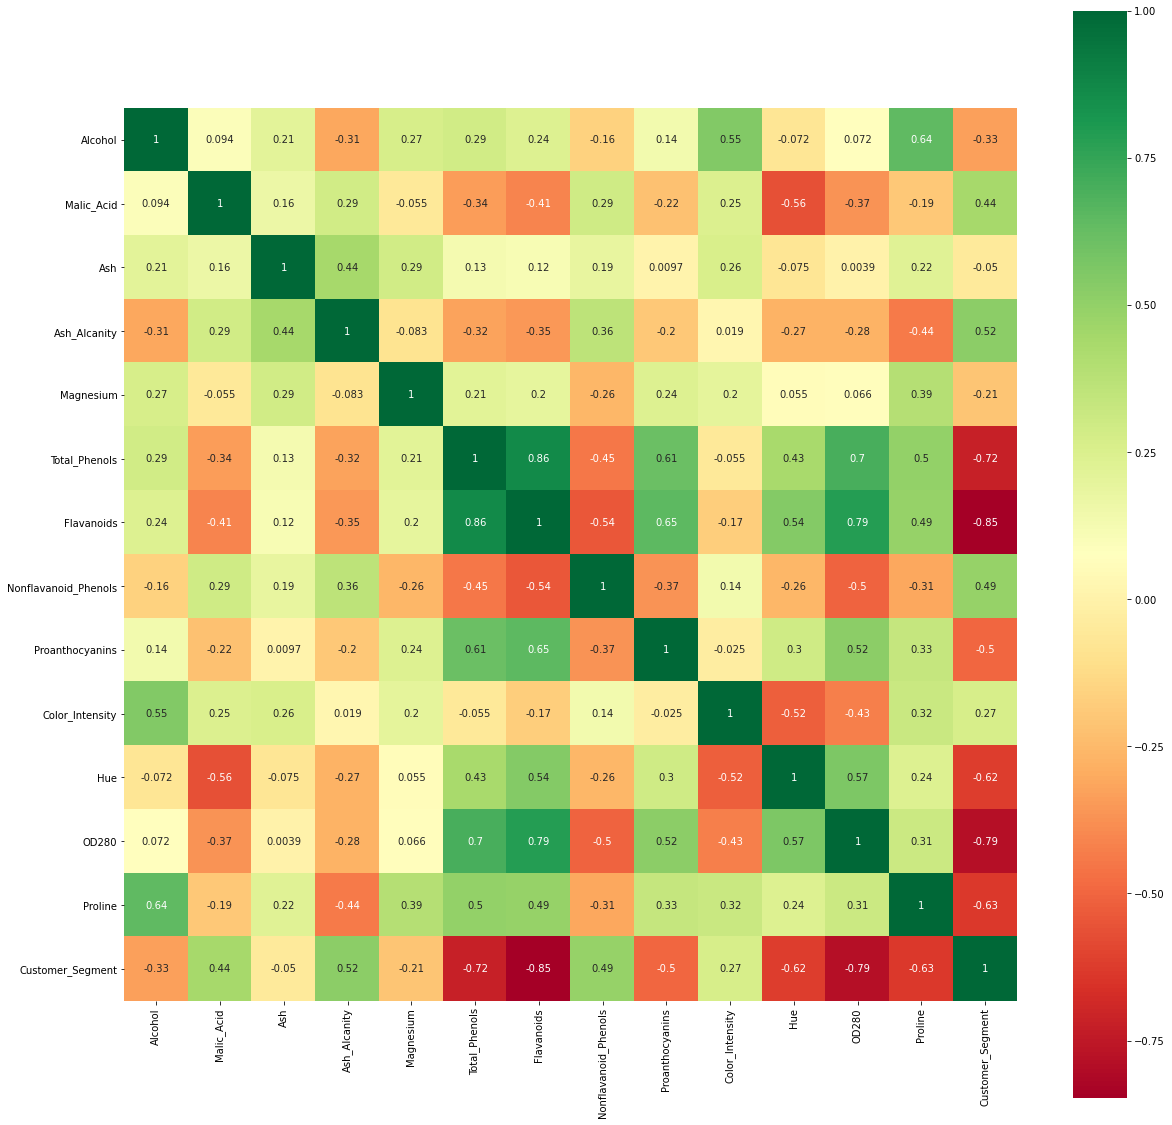

In [7]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(data_frame.corr(method='pearson'), annot=True, cmap='RdYlGn', square=True)

<h4> Observaciones </h4>
Los que presentan una mayor correlación positiva con respecto a la columna salary son las columnas de : ssc_p que presenta una correlación positiva de 0.54 la cual presenta una asosiación moderada, hsc_p que presenta una correlación positiva de 0.45 la cual presenta una asosiación moderada, degree_p que presenta una correlación positiva de 0.41 la cual presenta una asosiación moderada y clasi_status que presenta una correlación positiva de 0.87 la cual presenta una asosiación muy alta y es la mejor correlación entre todas las columnas. Ademas la columna de clasi_ssc_b presenta una correlacion negativa de -0.035

# Gráficos de dispersión de las columnas del dataset

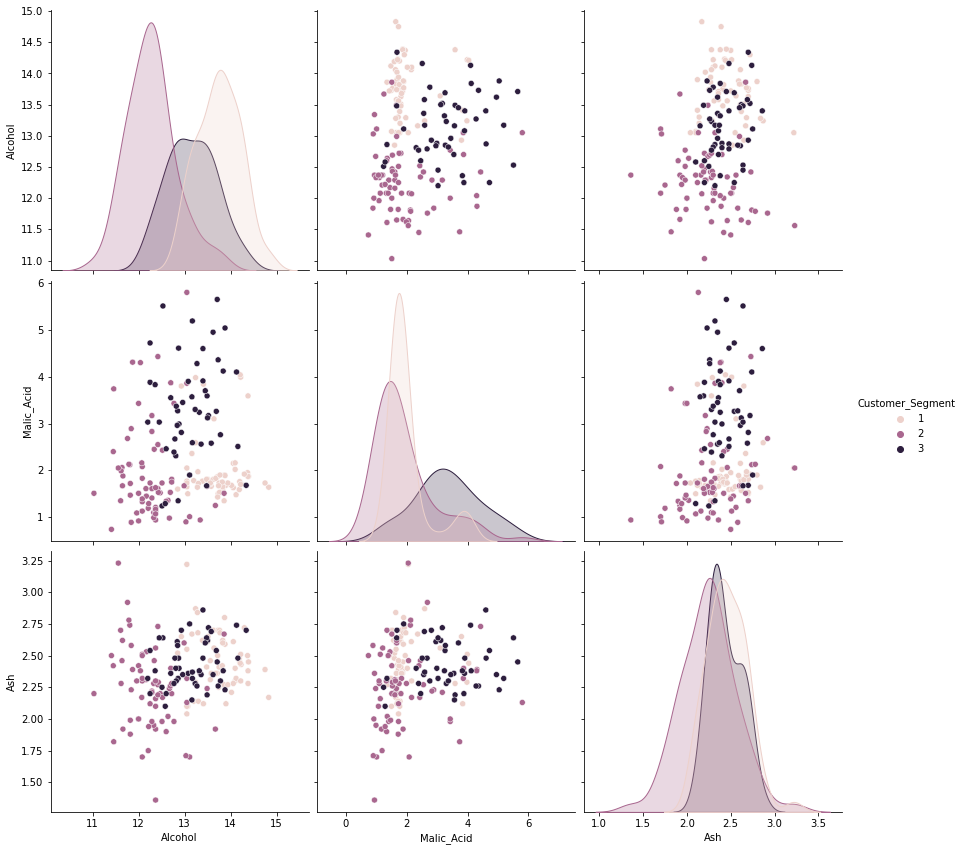

In [8]:
sns.pairplot(data_frame.dropna(), hue='Customer_Segment', height=4,vars=["Alcohol","Malic_Acid","Ash"], kind= 'scatter')

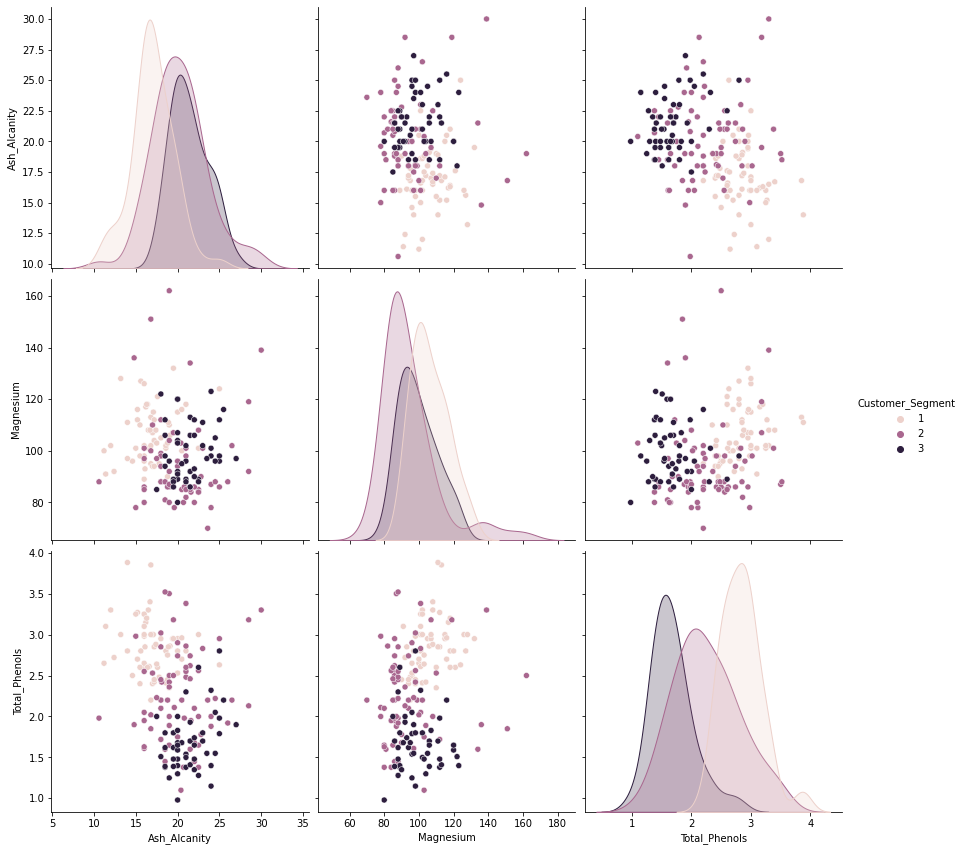

In [9]:
sns.pairplot(data_frame.dropna(), hue='Customer_Segment', height=4,vars=["Ash_Alcanity","Magnesium","Total_Phenols"], kind= 'scatter')

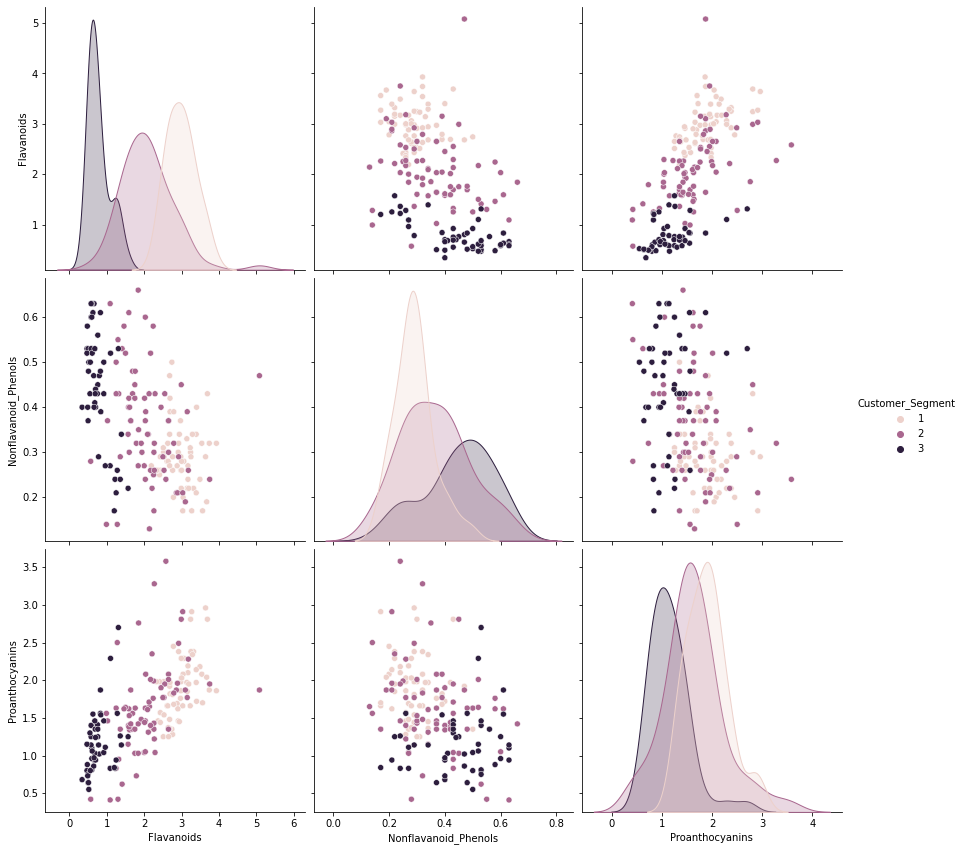

In [10]:
sns.pairplot(data_frame.dropna(), hue='Customer_Segment', height=4,vars=["Flavanoids","Nonflavanoid_Phenols","Proanthocyanins"], kind= 'scatter')

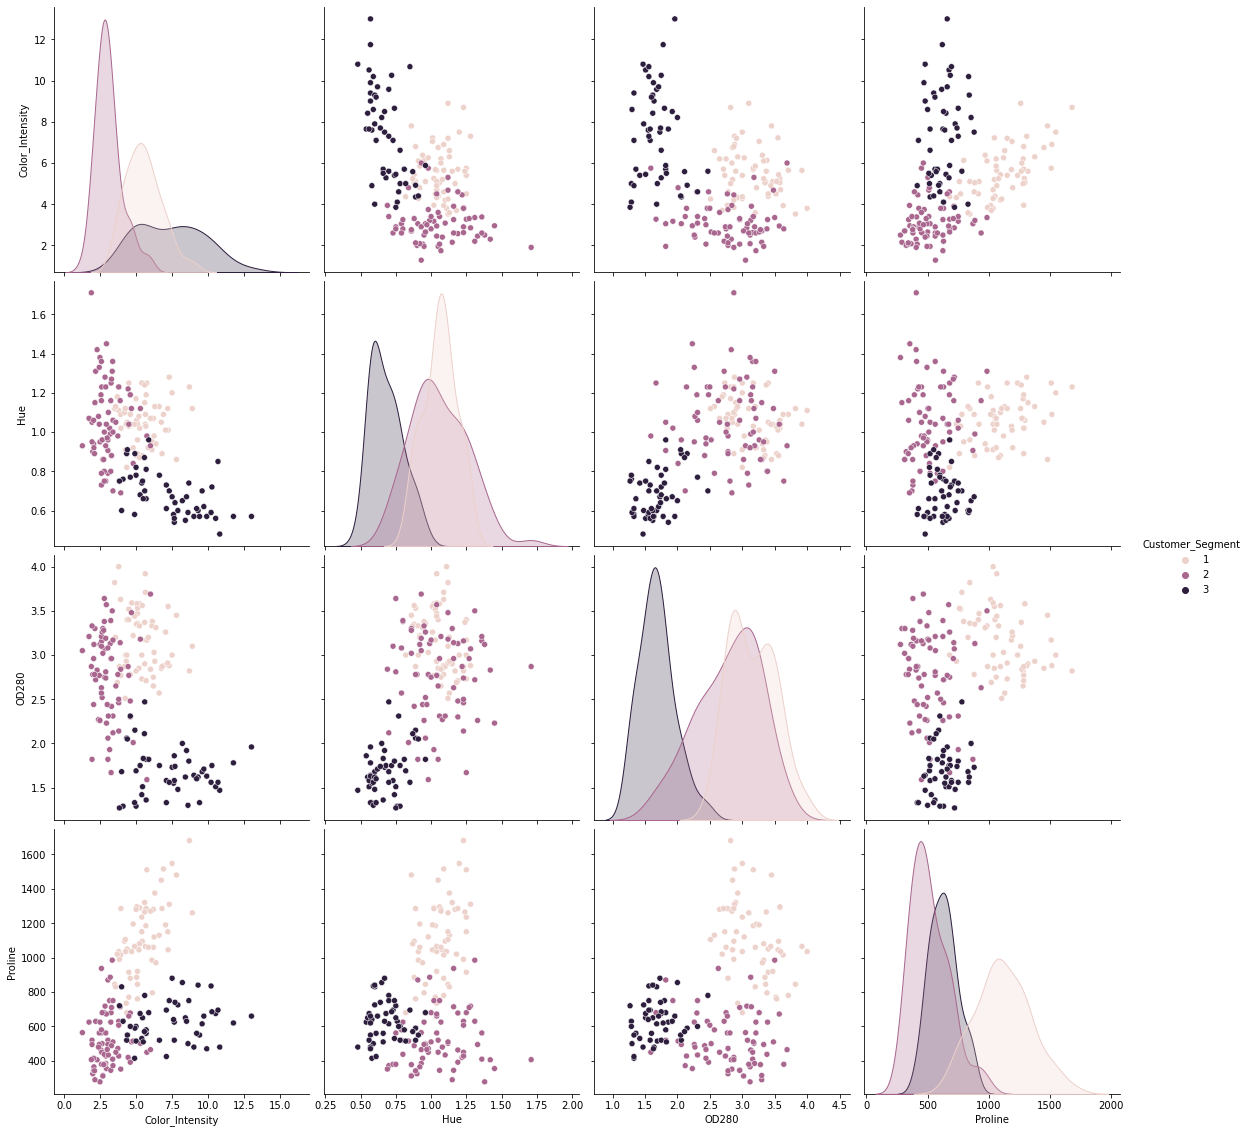

In [11]:
sns.pairplot(data_frame.dropna(), hue='Customer_Segment', height=4,vars=["Color_Intensity","Hue","OD280","Proline"], kind= 'scatter')

<h4> Observaciones </h4>

# Gráficos boxplot(caja bigote) para revisar posibles outliers

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


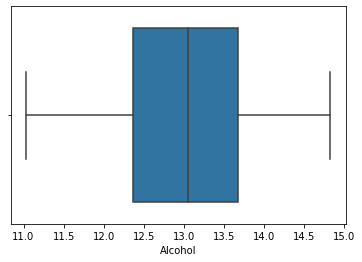

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


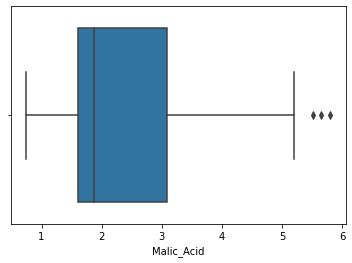

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


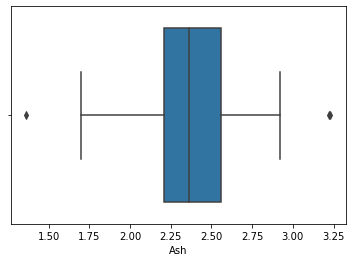

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


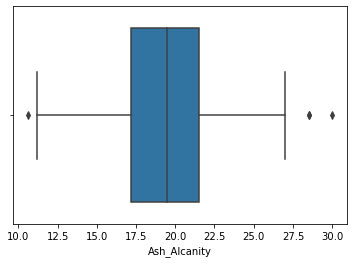

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


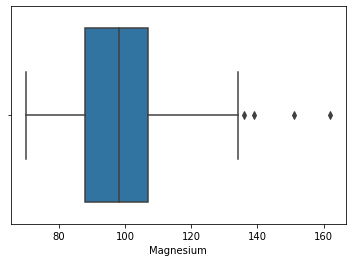

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


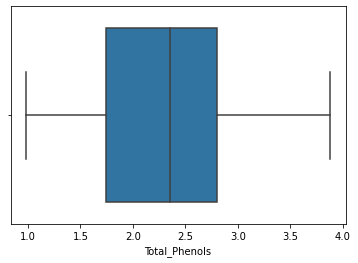

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


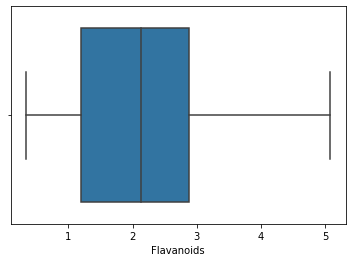

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


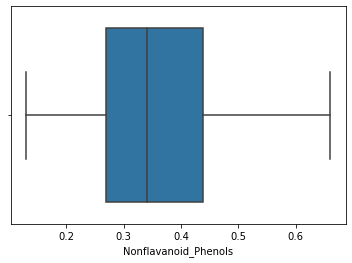

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


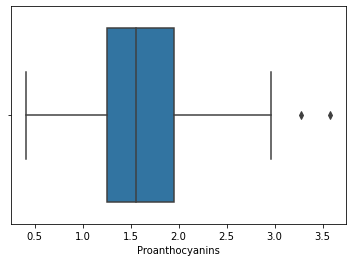

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


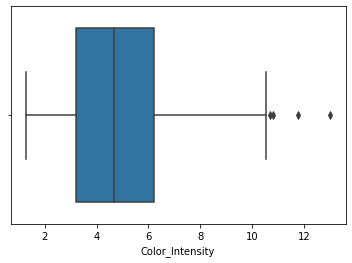

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


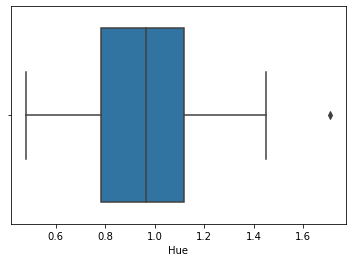

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


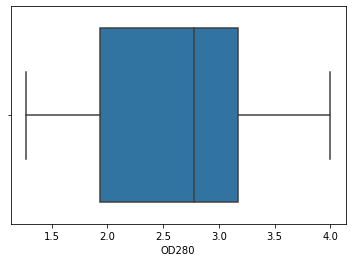

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


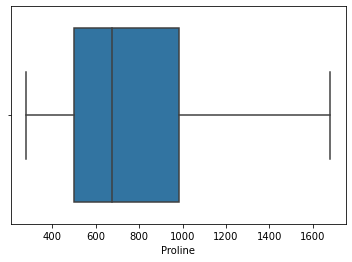

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


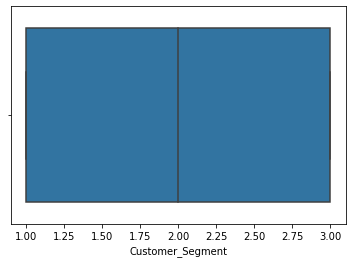

In [12]:
df1=data_frame.select_dtypes(exclude='object')
for i in range(len(df1.columns)):
    sns.boxplot(df1.iloc[:,i])
    plt.show()

<h4> Observaciones </h4>
Se observan que la columna de Malic_Acid, Ash, Ash_Alcanity, Magnesium, Proanthocyanins, Color_Intensity y Hue presentan outliers. Las demás columnas no presentan outliers



# Gráficos de los outliers encontrados por separado



C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


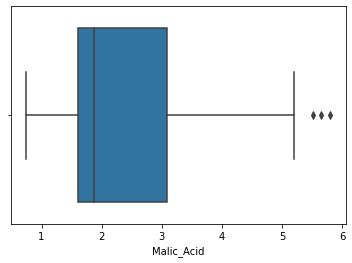

In [13]:
sns.boxplot(data_frame['Malic_Acid'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


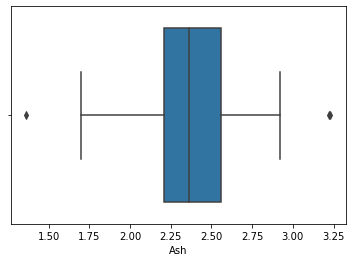

In [14]:
sns.boxplot(data_frame['Ash'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


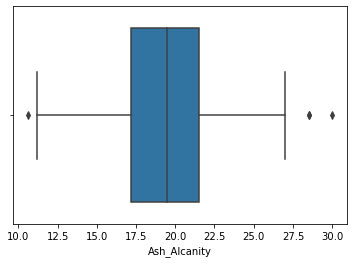

In [15]:
sns.boxplot(data_frame['Ash_Alcanity'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


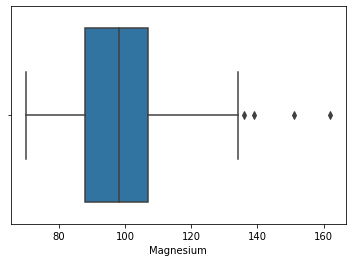

In [16]:
sns.boxplot(data_frame['Magnesium'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


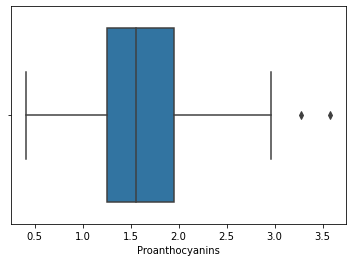

In [17]:
sns.boxplot(data_frame['Proanthocyanins'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


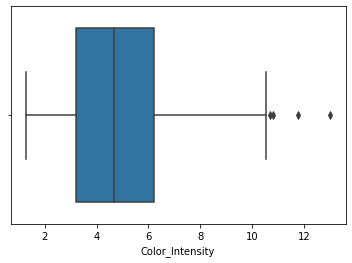

In [18]:
sns.boxplot(data_frame['Color_Intensity'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


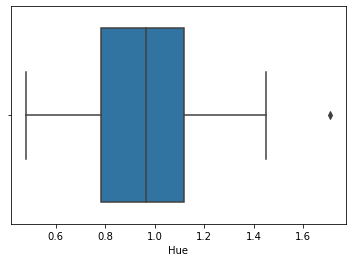

In [19]:
sns.boxplot(data_frame['Hue'])
plt.show()

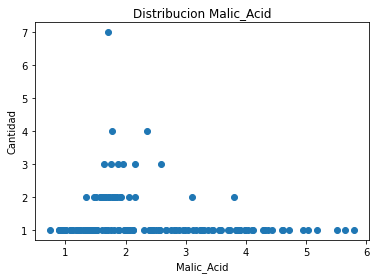

In [20]:
x_values = data_frame.Malic_Acid.unique()
y_values = data_frame.Malic_Acid.value_counts().tolist()
plt.scatter(x_values,y_values,marker='o')
plt.title('Distribucion Malic_Acid')
plt.xlabel('Malic_Acid')
plt.ylabel('Cantidad')
plt.show()

<h4> Observaciones </h4>
En base al grafico creado de Malic_Acid , podemos evidenciar una mayor concentracion de datos entre los valores de 1 y 4, ademas de existir una cantidad no muy considerable de datos lejanos a la agrupacion

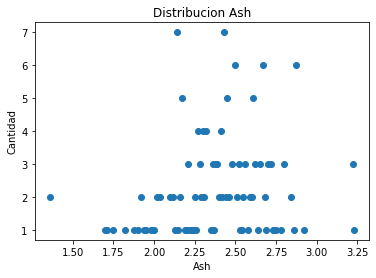

In [21]:
x_values = data_frame.Ash.unique()
y_values = data_frame.Ash.value_counts().tolist()
plt.scatter(x_values,y_values,marker='o')
plt.title('Distribucion Ash')
plt.xlabel('Ash')
plt.ylabel('Cantidad')
plt.show()

<h4> Observaciones </h4>
En base al grafico creado de Ash , podemos evidenciar una mayor concentracion de datos entre los valores de 1.75 y 3, ademas de existir una cantidad no muy considerable de datos lejanos a la agrupacion

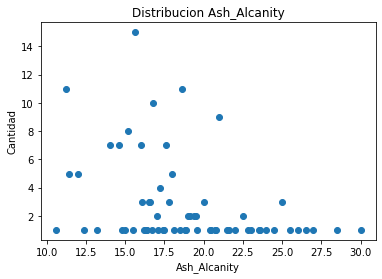

In [22]:
x_values = data_frame.Ash_Alcanity.unique()
y_values = data_frame.Ash_Alcanity.value_counts().tolist()
plt.scatter(x_values,y_values,marker='o')
plt.title('Distribucion Ash_Alcanity')
plt.xlabel('Ash_Alcanity')
plt.ylabel('Cantidad')
plt.show()

<h4> Observaciones </h4>
En base al grafico creado de Ash_Alcanity , podemos evidenciar una mayor concentracion de datos entre los valores de 15 y 25, ademas de existir una cantidad considerable de datos lejanos a la agrupacion

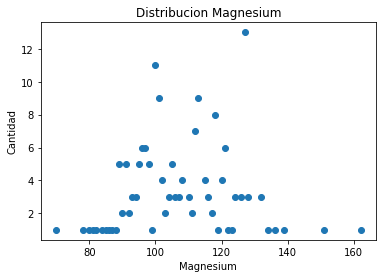

In [23]:
x_values = data_frame.Magnesium.unique()
y_values = data_frame.Magnesium.value_counts().tolist()
plt.scatter(x_values,y_values,marker='o')
plt.title('Distribucion Magnesium')
plt.xlabel('Magnesium')
plt.ylabel('Cantidad')
plt.show()



<h4> Observaciones </h4>
En base al grafico creado de Magnesium , podemos evidenciar una mayor concentracion de datos entre los valores de 90 y 140, ademas de existir una cantidad no muy considerable de datos lejanos a la agrupacion

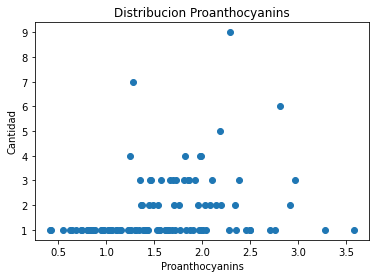

In [24]:
x_values = data_frame.Proanthocyanins.unique()
y_values = data_frame.Proanthocyanins.value_counts().tolist()
plt.scatter(x_values,y_values,marker='o')
plt.title('Distribucion Proanthocyanins')
plt.xlabel('Proanthocyanins')
plt.ylabel('Cantidad')
plt.show()

<h4> Observaciones </h4>
En base al grafico creado de Proanthocyanins , podemos evidenciar una mayor concentracion de datos entre los valores de 1 y 3, ademas de existir una cantidad no muy considerable de datos lejanos a la agrupacion

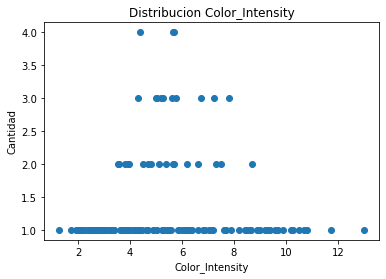

In [25]:
x_values = data_frame.Color_Intensity.unique()
y_values = data_frame.Color_Intensity.value_counts().tolist()
plt.scatter(x_values,y_values,marker='o')
plt.title('Distribucion Color_Intensity')
plt.xlabel('Color_Intensity')
plt.ylabel('Cantidad')
plt.show()

<h4> Observaciones </h4>
En base al grafico creado de Color_Intensity , podemos evidenciar una mayor concentracion de datos entre los valores de 4 y 9, ademas de existir una cantidad no muy considerable de datos lejanos a la agrupacion

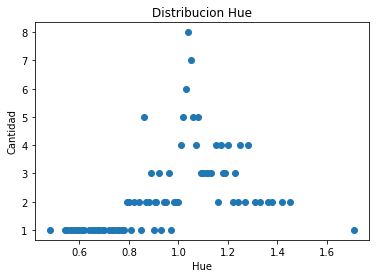

In [26]:
x_values = data_frame.Hue.unique()
y_values = data_frame.Hue.value_counts().tolist()
plt.scatter(x_values,y_values,marker='o')
plt.title('Distribucion Hue')
plt.xlabel('Hue')
plt.ylabel('Cantidad')
plt.show()

<h4> Observaciones </h4>
En base al grafico creado de Hue , podemos evidenciar una mayor concentracion de datos entre los valores de 0.8 y 1.4, ademas de existir una cantidad no muy considerable de datos lejanos a la agrupacion

# Calculos del cuartil para las columnas que tiene outliers en este caso son: Malic_Acid, Ash, Ash_Alcanity, Magnesium, Proanthocyanins, Color_Intensity y Hue   


In [27]:
Q1_Malic_Acid = data_frame['Malic_Acid'].quantile(0.25)
print("Primer cuartil",Q1_Malic_Acid)
Q3_Malic_Acid = data_frame['Malic_Acid'].quantile(0.75)
print("Tercer cuartil",Q3_Malic_Acid)

IQR_Malic_Acid = Q3_Malic_Acid-Q1_Malic_Acid
print("Rango intercuartil",IQR_Malic_Acid)

Mediana_Malic_Acid = data_frame['Malic_Acid'].median()
print("La mediana es :",Mediana_Malic_Acid)
Valor_minimo_Malic_Acid = data_frame['Malic_Acid'].min()
print("Valor minimo :",Valor_minimo_Malic_Acid)
Valor_maximo_Malic_Acid = data_frame['Malic_Acid'].max()
print("Valor maximo es :",Valor_maximo_Malic_Acid)

#Calculamos los valores de los bigotes inferior y superior
BI_Calculado_Malic_Acid = (Q1_Malic_Acid - 1.5 * IQR_Malic_Acid)
print("BI Calculado:",BI_Calculado_Malic_Acid)

BS_Calculado_Malic_Acid = (Q3_Malic_Acid + 1.5 * IQR_Malic_Acid)
print("BS Calcular:",BS_Calculado_Malic_Acid)


Primer cuartil 1.6025000000000003
Tercer cuartil 3.0825
Rango intercuartil 1.4799999999999998
La mediana es : 1.8650000000000002
Valor minimo : 0.74
Valor maximo es : 5.8
BI Calculado: -0.6174999999999995
BS Calcular: 5.3025


<h4> Observaciones </h4>

Se puede observar que el valor maximo(5.8) es mayor al BS(5.3025) por ende ya se sabe desde que límite se efectuará la limpieza

In [28]:
Q1_Ash = data_frame['Ash'].quantile(0.25)
print("Primer cuartil",Q1_Ash)
Q3_Ash = data_frame['Ash'].quantile(0.75)
print("Tercer cuartil",Q3_Ash)

IQR_Ash = Q3_Ash-Q1_Ash
print("Rango intercuartil",IQR_Ash)

Mediana_Ash = data_frame['Ash'].median()
print("La mediana es :",Mediana_Ash)
Valor_minimo_Ash = data_frame['Ash'].min()
print("Valor minimo :",Valor_minimo_Ash)
Valor_maximo_Ash = data_frame['Ash'].max()
print("Valor maximo es :",Valor_maximo_Ash)

#Calculamos los valores de los bigotes inferior y superior
BI_Calculado_Ash = (Q1_Ash - 1.5 * IQR_Ash)
print("BI Calculado:",BI_Calculado_Ash)

BS_Calculado_Ash = (Q3_Ash + 1.5 * IQR_Ash)
print("BS Calcular:",BS_Calculado_Ash)


Primer cuartil 2.21
Tercer cuartil 2.5575
Rango intercuartil 0.34750000000000014
La mediana es : 2.36
Valor minimo : 1.36
Valor maximo es : 3.23
BI Calculado: 1.6887499999999998
BS Calcular: 3.0787500000000003


<h4> Observaciones </h4>

Se puede observar que el valor minimo(1.36) es menor al BI(1.6887499999999998) y el valor maximo(3.23) es mayor al BS(3.0787500000000003) por ende ya se sabe desde que límites se efectuará la limpieza

In [29]:
Q1_Ash_Alcanity = data_frame['Ash_Alcanity'].quantile(0.25)
print("Primer cuartil",Q1_Ash_Alcanity)
Q3_Ash_Alcanity = data_frame['Ash_Alcanity'].quantile(0.75)
print("Tercer cuartil",Q3_Ash_Alcanity)

IQR_Ash_Alcanity = Q3_Ash_Alcanity-Q1_Ash_Alcanity
print("Rango intercuartil",IQR_Ash_Alcanity)

Mediana_Ash_Alcanity = data_frame['Ash_Alcanity'].median()
print("La mediana es :",Mediana_Ash_Alcanity)
Valor_minimo_Ash_Alcanity = data_frame['Ash_Alcanity'].min()
print("Valor minimo :",Valor_minimo_Ash_Alcanity)
Valor_maximo_Ash_Alcanity = data_frame['Ash_Alcanity'].max()
print("Valor maximo es :",Valor_maximo_Ash_Alcanity)

#Calculamos los valores de los bigotes inferior y superior
BI_Calculado_Ash_Alcanity = (Q1_Ash_Alcanity - 1.5 * IQR_Ash_Alcanity)
print("BI Calculado:",BI_Calculado_Ash_Alcanity)

BS_Calculado_Ash_Alcanity = (Q3_Ash_Alcanity + 1.5 * IQR_Ash_Alcanity)
print("BS Calcular:",BS_Calculado_Ash_Alcanity)


Primer cuartil 17.2
Tercer cuartil 21.5
Rango intercuartil 4.300000000000001
La mediana es : 19.5
Valor minimo : 10.6
Valor maximo es : 30.0
BI Calculado: 10.749999999999998
BS Calcular: 27.950000000000003


<h4> Observaciones </h4>

Se puede observar que el valor minimo(10.6) es menor al BI(10.749999999999998) y el valor maximo(30.0) es mayor al BS(27.950000000000003) por ende ya se sabe desde que límites se efectuará la limpieza

In [30]:
Q1_Magnesium = data_frame['Magnesium'].quantile(0.25)
print("Primer cuartil",Q1_Magnesium)
Q3_Magnesium = data_frame['Magnesium'].quantile(0.75)
print("Tercer cuartil",Q3_Magnesium)

IQR_Magnesium = Q3_Magnesium-Q1_Magnesium
print("Rango intercuartil",IQR_Magnesium)

Mediana_Magnesium = data_frame['Magnesium'].median()
print("La mediana es :",Mediana_Magnesium)
Valor_minimo_Magnesium = data_frame['Magnesium'].min()
print("Valor minimo :",Valor_minimo_Magnesium)
Valor_maximo_Magnesium = data_frame['Magnesium'].max()
print("Valor maximo es :",Valor_maximo_Magnesium)

#Calculamos los valores de los bigotes inferior y superior
BI_Calculado_Magnesium = (Q1_Magnesium - 1.5 * IQR_Magnesium)
print("BI Calculado:",BI_Calculado_Magnesium)

BS_Calculado_Magnesium = (Q3_Magnesium + 1.5 * IQR_Magnesium)
print("BS Calcular:",BS_Calculado_Magnesium)


Primer cuartil 88.0
Tercer cuartil 107.0
Rango intercuartil 19.0
La mediana es : 98.0
Valor minimo : 70
Valor maximo es : 162
BI Calculado: 59.5
BS Calcular: 135.5


<h4> Observaciones </h4>

Se puede observar que el valor maximo(162) es mayor al BS(135.5) por ende ya se sabe desde que límite se efectuará la limpieza

In [31]:
Q1_Proanthocyanins = data_frame['Proanthocyanins'].quantile(0.25)
print("Primer cuartil",Q1_Proanthocyanins)
Q3_Proanthocyanins = data_frame['Proanthocyanins'].quantile(0.75)
print("Tercer cuartil",Q3_Proanthocyanins)

IQR_Proanthocyanins = Q3_Proanthocyanins-Q1_Proanthocyanins
print("Rango intercuartil",IQR_Proanthocyanins)

Mediana_Proanthocyanins = data_frame['Proanthocyanins'].median()
print("La mediana es :",Mediana_Proanthocyanins)
Valor_minimo_Proanthocyanins = data_frame['Proanthocyanins'].min()
print("Valor minimo :",Valor_minimo_Proanthocyanins)
Valor_maximo_Proanthocyanins = data_frame['Proanthocyanins'].max()
print("Valor maximo es :",Valor_maximo_Proanthocyanins)

#Calculamos los valores de los bigotes inferior y superior
BI_Calculado_Proanthocyanins = (Q1_Proanthocyanins - 1.5 * IQR_Proanthocyanins)
print("BI Calculado:",BI_Calculado_Proanthocyanins)

BS_Calculado_Proanthocyanins = (Q3_Proanthocyanins + 1.5 * IQR_Proanthocyanins)
print("BS Calcular:",BS_Calculado_Proanthocyanins)


Primer cuartil 1.25
Tercer cuartil 1.95
Rango intercuartil 0.7
La mediana es : 1.5550000000000002
Valor minimo : 0.41
Valor maximo es : 3.58
BI Calculado: 0.20000000000000018
BS Calcular: 3.0


<h4> Observaciones </h4>

Se puede observar que el valor maximo(3.58) es mayor al BS(3.0) por ende ya se sabe desde que límite se efectuará la limpieza

In [32]:
Q1_Color_Intensity = data_frame['Color_Intensity'].quantile(0.25)
print("Primer cuartil",Q1_Color_Intensity)
Q3_Color_Intensity = data_frame['Color_Intensity'].quantile(0.75)
print("Tercer cuartil",Q3_Color_Intensity)

IQR_Color_Intensity = Q3_Color_Intensity-Q1_Color_Intensity
print("Rango intercuartil",IQR_Color_Intensity)

Mediana_Color_Intensity = data_frame['Color_Intensity'].median()
print("La mediana es :",Mediana_Color_Intensity)
Valor_minimo_Color_Intensity = data_frame['Color_Intensity'].min()
print("Valor minimo :",Valor_minimo_Color_Intensity)
Valor_maximo_Color_Intensity = data_frame['Color_Intensity'].max()
print("Valor maximo es :",Valor_maximo_Color_Intensity)

#Calculamos los valores de los bigotes inferior y superior
BI_Calculado_Color_Intensity = (Q1_Color_Intensity - 1.5 * IQR_Color_Intensity)
print("BI Calculado:",BI_Calculado_Color_Intensity)

BS_Calculado_Color_Intensity = (Q3_Color_Intensity + 1.5 * IQR_Color_Intensity)
print("BS Calcular:",BS_Calculado_Color_Intensity)


Primer cuartil 3.2199999999999998
Tercer cuartil 6.2
Rango intercuartil 2.9800000000000004
La mediana es : 4.6899999999999995
Valor minimo : 1.28
Valor maximo es : 13.0
BI Calculado: -1.2500000000000009
BS Calcular: 10.670000000000002


<h4> Observaciones </h4>

Se puede observar que el valor maximo(13.0) es mayor al BS(10.670000000000002) por ende ya se sabe desde que límite se efectuará la limpieza

In [33]:
Q1_Hue = data_frame['Hue'].quantile(0.25)
print("Primer cuartil",Q1_Hue)
Q3_Hue = data_frame['Hue'].quantile(0.75)
print("Tercer cuartil",Q3_Hue)

IQR_Hue = Q3_Hue-Q1_Hue
print("Rango intercuartil",IQR_Hue)

Mediana_Hue = data_frame['Hue'].median()
print("La mediana es :",Mediana_Hue)
Valor_minimo_Hue = data_frame['Hue'].min()
print("Valor minimo :",Valor_minimo_Hue)
Valor_maximo_Hue = data_frame['Hue'].max()
print("Valor maximo es :",Valor_maximo_Hue)

#Calculamos los valores de los bigotes inferior y superior
BI_Calculado_Hue = (Q1_Hue - 1.5 * IQR_Hue)
print("BI Calculado:",BI_Calculado_Hue)

BS_Calculado_Hue = (Q3_Hue + 1.5 * IQR_Hue)
print("BS Calcular:",BS_Calculado_Hue)


Primer cuartil 0.7825
Tercer cuartil 1.12
Rango intercuartil 0.33750000000000013
La mediana es : 0.965
Valor minimo : 0.48
Valor maximo es : 1.71
BI Calculado: 0.2762499999999998
BS Calcular: 1.6262500000000002


<h4> Observaciones </h4>

Se puede observar que el valor maximo(1.71) es mayor al BS(1.6262500000000002) por ende ya se sabe desde que límite se efectuará la limpieza

In [34]:
ubicacion_outliers_Malic_Acid =  (data_frame['Malic_Acid'] < BI_Calculado_Malic_Acid) | (data_frame['Malic_Acid'] > BS_Calculado_Malic_Acid)  
print("\n Ubicacion de outliers \n",ubicacion_outliers_Malic_Acid)


 Ubicacion de outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
173     True
174    False
175    False
176    False
177    False
Name: Malic_Acid, Length: 178, dtype: bool


In [35]:
outliers_Malic_Acid = data_frame[ubicacion_outliers_Malic_Acid]
print("\n Lista de outliers \n",outliers_Malic_Acid)


 Lista de outliers 
      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
123    13.05        5.80  2.13          21.5         86           2.62   
137    12.53        5.51  2.64          25.0         96           1.79   
173    13.71        5.65  2.45          20.5         95           1.68   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
123        2.65                  0.30             2.01              2.6  0.73   
137        0.60                  0.63             1.10              5.0  0.82   
173        0.61                  0.52             1.06              7.7  0.64   

     OD280  Proline  Customer_Segment  
123   3.10      380                 2  
137   1.69      515                 3  
173   1.74      740                 3  


<h4> Observaciones </h4>

Se encontraron 3 outliers correspondientes a la columna de Malic_Acid la cual nos entrego los siguientes resultados: Fila 123, 137 y 173 fueron las filas outliers.

In [36]:
ubicacion_outliers_Ash =  (data_frame['Ash'] < BI_Calculado_Ash) | (data_frame['Ash'] > BS_Calculado_Ash)  
print("\n Ubicacion de outliers \n",ubicacion_outliers_Ash)


 Ubicacion de outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: Ash, Length: 178, dtype: bool


In [37]:
outliers_Ash = data_frame[ubicacion_outliers_Ash]
print("\n Lista de outliers \n",outliers_Ash)


 Lista de outliers 
      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
25     13.05        2.05  3.22          25.0        124           2.63   
59     12.37        0.94  1.36          10.6         88           1.98   
121    11.56        2.05  3.23          28.5        119           3.18   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
25         2.68                  0.47             1.92             3.58  1.13   
59         0.57                  0.28             0.42             1.95  1.05   
121        5.08                  0.47             1.87             6.00  0.93   

     OD280  Proline  Customer_Segment  
25    3.20      830                 1  
59    1.82      520                 2  
121   3.69      465                 2  


<h4> Observaciones </h4>

Se encontraron 3 outliers correspondientes a la columna de Ash la cual nos entrego los siguientes resultados: Fila 25, 59 y 121 fueron las filas outliers.

In [38]:
ubicacion_outliers_Ash_Alcanity =  (data_frame['Ash_Alcanity'] < BI_Calculado_Ash_Alcanity) | (data_frame['Ash_Alcanity'] > BS_Calculado_Ash_Alcanity)  
print("\n Ubicacion de outliers \n",ubicacion_outliers_Ash_Alcanity)


 Ubicacion de outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: Ash_Alcanity, Length: 178, dtype: bool


In [39]:
outliers_Ash_Alcanity = data_frame[ubicacion_outliers_Ash_Alcanity]
print("\n Lista de outliers \n",outliers_Ash_Alcanity)


 Lista de outliers 
      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
59     12.37        0.94  1.36          10.6         88           1.98   
73     12.99        1.67  2.60          30.0        139           3.30   
121    11.56        2.05  3.23          28.5        119           3.18   
127    11.79        2.13  2.78          28.5         92           2.13   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
59         0.57                  0.28             0.42             1.95  1.05   
73         2.89                  0.21             1.96             3.35  1.31   
121        5.08                  0.47             1.87             6.00  0.93   
127        2.24                  0.58             1.76             3.00  0.97   

     OD280  Proline  Customer_Segment  
59    1.82      520                 2  
73    3.50      985                 2  
121   3.69      465                 2  
127   2.44      466                 2  


<h4> Observaciones </h4>

Se encontraron 4 outliers correspondientes a la columna de Ash_Alcanity la cual nos entrego los siguientes resultados: Fila 59, 73, 121 y 127 fueron las filas outliers.

In [40]:
ubicacion_outliers_Magnesium =  (data_frame['Magnesium'] < BI_Calculado_Magnesium) | (data_frame['Magnesium'] > BS_Calculado_Magnesium)  
print("\n Ubicacion de outliers \n",ubicacion_outliers_Magnesium)


 Ubicacion de outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: Magnesium, Length: 178, dtype: bool


In [41]:
outliers_Magnesium = data_frame[ubicacion_outliers_Magnesium]
print("\n Lista de outliers \n",outliers_Magnesium)


 Lista de outliers 
     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
69    12.21        1.19  1.75          16.8        151           1.85   
73    12.99        1.67  2.60          30.0        139           3.30   
78    12.33        0.99  1.95          14.8        136           1.90   
95    12.47        1.52  2.20          19.0        162           2.50   

    Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
69        1.28                  0.14             2.50             2.85  1.28   
73        2.89                  0.21             1.96             3.35  1.31   
78        1.85                  0.35             2.76             3.40  1.06   
95        2.27                  0.32             3.28             2.60  1.16   

    OD280  Proline  Customer_Segment  
69   3.07      718                 2  
73   3.50      985                 2  
78   2.31      750                 2  
95   2.63      937                 2  


<h4> Observaciones </h4>

Se encontraron 4 outliers correspondientes a la columna de Magnesium la cual nos entrego los siguientes resultados: Fila 69, 73, 78 y 95 fueron las filas outliers.

In [42]:
ubicacion_outliers_Proanthocyanins =  (data_frame['Proanthocyanins'] < BI_Calculado_Proanthocyanins) | (data_frame['Proanthocyanins'] > BS_Calculado_Proanthocyanins)  
print("\n Ubicacion de outliers \n",ubicacion_outliers_Proanthocyanins)


 Ubicacion de outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: Proanthocyanins, Length: 178, dtype: bool


In [43]:
outliers_Proanthocyanins = data_frame[ubicacion_outliers_Proanthocyanins]
print("\n Lista de outliers \n",outliers_Proanthocyanins)


 Lista de outliers 
      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
95     12.47        1.52  2.20          19.0        162           2.50   
110    11.46        3.74  1.82          19.5        107           3.18   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
95         2.27                  0.32             3.28              2.6  1.16   
110        2.58                  0.24             3.58              2.9  0.75   

     OD280  Proline  Customer_Segment  
95    2.63      937                 2  
110   2.81      562                 2  


<h4> Observaciones </h4>

Se encontraron 2 outliers correspondientes a la columna de Proanthocyanins la cual nos entrego los siguientes resultados: Fila 95 y 110 fueron las filas outliers.

In [44]:
ubicacion_outliers_Color_Intensity =  (data_frame['Color_Intensity'] < BI_Calculado_Color_Intensity) | (data_frame['Color_Intensity'] > BS_Calculado_Color_Intensity)  
print("\n Ubicacion de outliers \n",ubicacion_outliers_Color_Intensity)


 Ubicacion de outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: Color_Intensity, Length: 178, dtype: bool


In [45]:
outliers_Color_Intensity = data_frame[ubicacion_outliers_Color_Intensity]
print("\n Lista de outliers \n",outliers_Color_Intensity)


 Lista de outliers 
      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
151    12.79        2.67  2.48          22.0        112           1.48   
158    14.34        1.68  2.70          25.0         98           2.80   
159    13.48        1.67  2.64          22.5         89           2.60   
166    13.45        3.70  2.60          23.0        111           1.70   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
151        1.36                  0.24             1.26            10.80  0.48   
158        1.31                  0.53             2.70            13.00  0.57   
159        1.10                  0.52             2.29            11.75  0.57   
166        0.92                  0.43             1.46            10.68  0.85   

     OD280  Proline  Customer_Segment  
151   1.47      480                 3  
158   1.96      660                 3  
159   1.78      620                 3  
166   1.56      695                 3  


<h4> Observaciones </h4>

Se encontraron 4 outliers correspondientes a la columna de Color_Intensity la cual nos entrego los siguientes resultados: Fila 151, 158, 159 y 166 fueron las filas outliers.

In [46]:
ubicacion_outliers_Hue =  (data_frame['Hue'] < BI_Calculado_Hue) | (data_frame['Hue'] > BS_Calculado_Hue)  
print("\n Ubicacion de outliers \n",ubicacion_outliers_Hue)


 Ubicacion de outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: Hue, Length: 178, dtype: bool


In [47]:
outliers_Hue = data_frame[ubicacion_outliers_Hue]
print("\n Lista de outliers \n",outliers_Hue)


 Lista de outliers 
      Alcohol  Malic_Acid  Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
115    11.03        1.51  2.2          21.5         85           2.46   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
115        2.17                  0.52             2.01              1.9  1.71   

     OD280  Proline  Customer_Segment  
115   2.87      407                 2  


<h4> Observaciones </h4>

Se encontró 1 outlier correspondiente a la columna de Hue la cual nos entrego el siguiente resultado: Fila 115 fue la fila outlier.

# Una vez ya identificados los outliers procedemos a realizar la limpieza correspondiente de cada columna que presente outliers

In [48]:
data_frame = data_frame.drop(data_frame[data_frame['Malic_Acid'] >= 5.3025].index)

In [49]:
data_frame = data_frame.drop(data_frame[data_frame['Ash'] <= 1.6887499999999998].index)


In [50]:
data_frame = data_frame.drop(data_frame[data_frame['Ash'] >= 3.0787500000000003].index)

In [51]:
data_frame = data_frame.drop(data_frame[data_frame['Ash_Alcanity'] <= 10.749999999999998].index)


In [52]:
data_frame = data_frame.drop(data_frame[data_frame['Ash_Alcanity'] >= 27.950000000000003].index)

In [53]:
data_frame = data_frame.drop(data_frame[data_frame['Magnesium'] >= 135.5].index)

In [54]:
data_frame = data_frame.drop(data_frame[data_frame['Proanthocyanins'] >= 3.0].index)

In [55]:
data_frame = data_frame.drop(data_frame[data_frame['Color_Intensity'] >= 10.670000000000002].index)

In [56]:
data_frame = data_frame.drop(data_frame[data_frame['Hue'] >= 1.6262500000000002].index)

In [57]:
data_frame.shape

(161, 14)

<h4> Observaciones </h4>

Se puede observar que con la limpieza de los outliers los datos se redujeron a 161

# Volvemos a graficar las columnas que presentaron outliers para ver si ya no tienen outliers

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


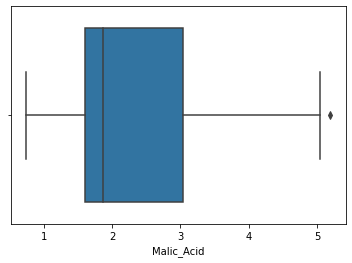

In [58]:
sns.boxplot(data_frame['Malic_Acid'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


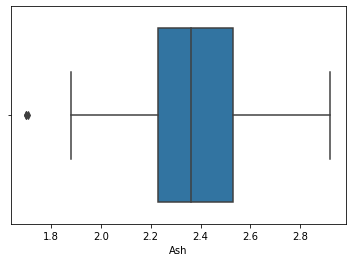

In [59]:
sns.boxplot(data_frame['Ash'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


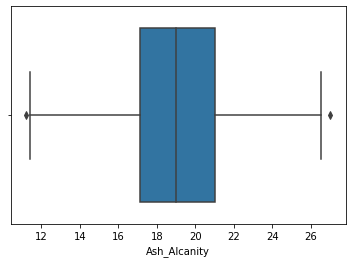

In [60]:
sns.boxplot(data_frame['Ash_Alcanity'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


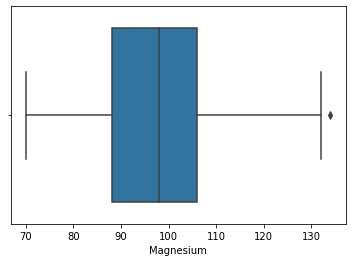

In [61]:
sns.boxplot(data_frame['Magnesium'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


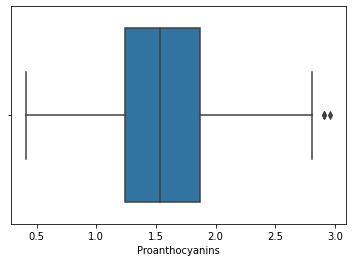

In [62]:
sns.boxplot(data_frame['Proanthocyanins'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


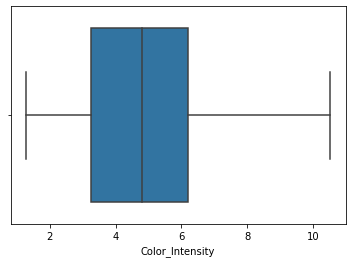

In [63]:
sns.boxplot(data_frame['Color_Intensity'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


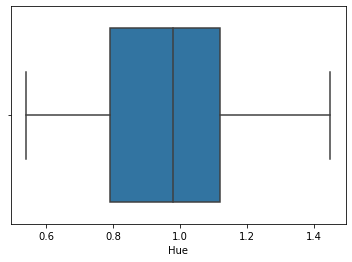

In [64]:
sns.boxplot(data_frame['Hue'])
plt.show()

<h4> Observaciones </h4>
Se puede observar que a pesar de la limpieza de outliers se volvieron a encontrar outliers por ende se procede a realizar los pasos antes mostrados.

Se encontraron outliers en las columnas de Malic_Acid, Ash, Ash_Alcanity, Magnesium y Proanthocyanins.

# Calculos del cuartil para las columnas que tiene outliers en este caso son: Malic_Acid, Ash, Ash_Alcanity, Magnesium y Proanthocyanins 

In [65]:
Q1_Malic_Acid = data_frame['Malic_Acid'].quantile(0.25)
print("Primer cuartil",Q1_Malic_Acid)
Q3_Malic_Acid = data_frame['Malic_Acid'].quantile(0.75)
print("Tercer cuartil",Q3_Malic_Acid)

IQR_Malic_Acid = Q3_Malic_Acid-Q1_Malic_Acid
print("Rango intercuartil",IQR_Malic_Acid)

Mediana_Malic_Acid = data_frame['Malic_Acid'].median()
print("La mediana es :",Mediana_Malic_Acid)
Valor_minimo_Malic_Acid = data_frame['Malic_Acid'].min()
print("Valor minimo :",Valor_minimo_Malic_Acid)
Valor_maximo_Malic_Acid = data_frame['Malic_Acid'].max()
print("Valor maximo es :",Valor_maximo_Malic_Acid)

#Calculamos los valores de los bigotes inferior y superior
BI_Calculado_Malic_Acid = (Q1_Malic_Acid - 1.5 * IQR_Malic_Acid)
print("BI Calculado:",BI_Calculado_Malic_Acid)

BS_Calculado_Malic_Acid = (Q3_Malic_Acid + 1.5 * IQR_Malic_Acid)
print("BS Calcular:",BS_Calculado_Malic_Acid)


Primer cuartil 1.61
Tercer cuartil 3.03
Rango intercuartil 1.4199999999999997
La mediana es : 1.86
Valor minimo : 0.74
Valor maximo es : 5.19
BI Calculado: -0.5199999999999994
BS Calcular: 5.159999999999999


<h4> Observaciones </h4>

Se puede observar que el valor maximo(5.19) es mayor al BS(5.159999999999999) por ende ya se sabe desde que límite se efectuará la limpieza

In [66]:
Q1_Ash = data_frame['Ash'].quantile(0.25)
print("Primer cuartil",Q1_Ash)
Q3_Ash = data_frame['Ash'].quantile(0.75)
print("Tercer cuartil",Q3_Ash)

IQR_Ash = Q3_Ash-Q1_Ash
print("Rango intercuartil",IQR_Ash)

Mediana_Ash = data_frame['Ash'].median()
print("La mediana es :",Mediana_Ash)
Valor_minimo_Ash = data_frame['Ash'].min()
print("Valor minimo :",Valor_minimo_Ash)
Valor_maximo_Ash = data_frame['Ash'].max()
print("Valor maximo es :",Valor_maximo_Ash)

#Calculamos los valores de los bigotes inferior y superior
BI_Calculado_Ash = (Q1_Ash - 1.5 * IQR_Ash)
print("BI Calculado:",BI_Calculado_Ash)

BS_Calculado_Ash = (Q3_Ash + 1.5 * IQR_Ash)
print("BS Calcular:",BS_Calculado_Ash)


Primer cuartil 2.23
Tercer cuartil 2.53
Rango intercuartil 0.2999999999999998
La mediana es : 2.36
Valor minimo : 1.7
Valor maximo es : 2.92
BI Calculado: 1.7800000000000002
BS Calcular: 2.9799999999999995


<h4> Observaciones </h4>

Se puede observar que el valor minimo(1.7) es menor al BI(1.7800000000000002) por ende ya se sabe desde que límite se efectuará la limpieza

In [67]:
Q1_Ash_Alcanity = data_frame['Ash_Alcanity'].quantile(0.25)
print("Primer cuartil",Q1_Ash_Alcanity)
Q3_Ash_Alcanity = data_frame['Ash_Alcanity'].quantile(0.75)
print("Tercer cuartil",Q3_Ash_Alcanity)

IQR_Ash_Alcanity = Q3_Ash_Alcanity-Q1_Ash_Alcanity
print("Rango intercuartil",IQR_Ash_Alcanity)

Mediana_Ash_Alcanity = data_frame['Ash_Alcanity'].median()
print("La mediana es :",Mediana_Ash_Alcanity)
Valor_minimo_Ash_Alcanity = data_frame['Ash_Alcanity'].min()
print("Valor minimo :",Valor_minimo_Ash_Alcanity)
Valor_maximo_Ash_Alcanity = data_frame['Ash_Alcanity'].max()
print("Valor maximo es :",Valor_maximo_Ash_Alcanity)

#Calculamos los valores de los bigotes inferior y superior
BI_Calculado_Ash_Alcanity = (Q1_Ash_Alcanity - 1.5 * IQR_Ash_Alcanity)
print("BI Calculado:",BI_Calculado_Ash_Alcanity)

BS_Calculado_Ash_Alcanity = (Q3_Ash_Alcanity + 1.5 * IQR_Ash_Alcanity)
print("BS Calcular:",BS_Calculado_Ash_Alcanity)


Primer cuartil 17.1
Tercer cuartil 21.0
Rango intercuartil 3.8999999999999986
La mediana es : 19.0
Valor minimo : 11.2
Valor maximo es : 27.0
BI Calculado: 11.250000000000004
BS Calcular: 26.849999999999998


<h4> Observaciones </h4>

Se puede observar que el valor minimo(11.2) es menor al BI(11.250000000000004) y el valor maximo(27.0) es mayor al BS(26.849999999999998) por ende ya se sabe desde que límites se efectuará la limpieza

In [68]:
Q1_Magnesium = data_frame['Magnesium'].quantile(0.25)
print("Primer cuartil",Q1_Magnesium)
Q3_Magnesium = data_frame['Magnesium'].quantile(0.75)
print("Tercer cuartil",Q3_Magnesium)

IQR_Magnesium = Q3_Magnesium-Q1_Magnesium
print("Rango intercuartil",IQR_Magnesium)

Mediana_Magnesium = data_frame['Magnesium'].median()
print("La mediana es :",Mediana_Magnesium)
Valor_minimo_Magnesium = data_frame['Magnesium'].min()
print("Valor minimo :",Valor_minimo_Magnesium)
Valor_maximo_Magnesium = data_frame['Magnesium'].max()
print("Valor maximo es :",Valor_maximo_Magnesium)

#Calculamos los valores de los bigotes inferior y superior
BI_Calculado_Magnesium = (Q1_Magnesium - 1.5 * IQR_Magnesium)
print("BI Calculado:",BI_Calculado_Magnesium)

BS_Calculado_Magnesium = (Q3_Magnesium + 1.5 * IQR_Magnesium)
print("BS Calcular:",BS_Calculado_Magnesium)


Primer cuartil 88.0
Tercer cuartil 106.0
Rango intercuartil 18.0
La mediana es : 98.0
Valor minimo : 70
Valor maximo es : 134
BI Calculado: 61.0
BS Calcular: 133.0


<h4> Observaciones </h4>

Se puede observar que el valor maximo(134) es mayor al BS(133.0) por ende ya se sabe desde que límite se efectuará la limpieza

In [69]:
Q1_Proanthocyanins = data_frame['Proanthocyanins'].quantile(0.25)
print("Primer cuartil",Q1_Proanthocyanins)
Q3_Proanthocyanins = data_frame['Proanthocyanins'].quantile(0.75)
print("Tercer cuartil",Q3_Proanthocyanins)

IQR_Proanthocyanins = Q3_Proanthocyanins-Q1_Proanthocyanins
print("Rango intercuartil",IQR_Proanthocyanins)

Mediana_Proanthocyanins = data_frame['Proanthocyanins'].median()
print("La mediana es :",Mediana_Proanthocyanins)
Valor_minimo_Proanthocyanins = data_frame['Proanthocyanins'].min()
print("Valor minimo :",Valor_minimo_Proanthocyanins)
Valor_maximo_Proanthocyanins = data_frame['Proanthocyanins'].max()
print("Valor maximo es :",Valor_maximo_Proanthocyanins)

#Calculamos los valores de los bigotes inferior y superior
BI_Calculado_Proanthocyanins = (Q1_Proanthocyanins - 1.5 * IQR_Proanthocyanins)
print("BI Calculado:",BI_Calculado_Proanthocyanins)

BS_Calculado_Proanthocyanins = (Q3_Proanthocyanins + 1.5 * IQR_Proanthocyanins)
print("BS Calcular:",BS_Calculado_Proanthocyanins)


Primer cuartil 1.24
Tercer cuartil 1.87
Rango intercuartil 0.6300000000000001
La mediana es : 1.53
Valor minimo : 0.41
Valor maximo es : 2.96
BI Calculado: 0.2949999999999998
BS Calcular: 2.8150000000000004


<h4> Observaciones </h4>

Se puede observar que el valor maximo(2.96) es mayor al BS(2.8150000000000004) por ende ya se sabe desde que límite se efectuará la limpieza

In [70]:
ubicacion_outliers_Malic_Acid =  (data_frame['Malic_Acid'] < BI_Calculado_Malic_Acid) | (data_frame['Malic_Acid'] > BS_Calculado_Malic_Acid)  
print("\n Ubicacion de outliers \n",ubicacion_outliers_Malic_Acid)


 Ubicacion de outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
172    False
174    False
175    False
176    False
177    False
Name: Malic_Acid, Length: 161, dtype: bool


In [71]:
outliers_Malic_Acid = data_frame[ubicacion_outliers_Malic_Acid]
print("\n Lista de outliers \n",outliers_Malic_Acid)


 Lista de outliers 
      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
155    13.17        5.19  2.32          22.0         93           1.74   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  Hue  \
155        0.63                  0.61             1.55              7.9  0.6   

     OD280  Proline  Customer_Segment  
155   1.48      725                 3  


<h4> Observaciones </h4>

Se encontró 1 outlier correspondiente a la columna de Malic_Acid la cual nos entregó el siguiente resultado: Fila 155 fue la fila outlier.

In [72]:
ubicacion_outliers_Ash =  (data_frame['Ash'] < BI_Calculado_Ash) | (data_frame['Ash'] > BS_Calculado_Ash)  
print("\n Ubicacion de outliers \n",ubicacion_outliers_Ash)


 Ubicacion de outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
172    False
174    False
175    False
176    False
177    False
Name: Ash, Length: 161, dtype: bool


In [73]:
outliers_Ash = data_frame[ubicacion_outliers_Ash]
print("\n Lista de outliers \n",outliers_Ash)


 Lista de outliers 
      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
66     13.11        1.01  1.70          15.0         78           2.98   
76     13.03        0.90  1.71          16.0         86           1.95   
100    12.08        2.08  1.70          17.5         97           2.23   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
66         3.18                  0.26             2.28              5.3  1.12   
76         2.03                  0.24             1.46              4.6  1.19   
100        2.17                  0.26             1.40              3.3  1.27   

     OD280  Proline  Customer_Segment  
66    3.18      502                 2  
76    2.48      392                 2  
100   2.96      710                 2  


<h4> Observaciones </h4>

Se encontraron 3 outliers correspondientes a la columna de Ash la cual nos entrego los siguientes resultados: Fila 66, 76 y 100 fueron las filas outliers.

In [74]:
ubicacion_outliers_Ash_Alcanity =  (data_frame['Ash_Alcanity'] < BI_Calculado_Ash_Alcanity) | (data_frame['Ash_Alcanity'] > BS_Calculado_Ash_Alcanity)  
print("\n Ubicacion de outliers \n",ubicacion_outliers_Ash_Alcanity)


 Ubicacion de outliers 
 0      False
1       True
2      False
3      False
4      False
       ...  
172    False
174    False
175    False
176    False
177    False
Name: Ash_Alcanity, Length: 161, dtype: bool


In [75]:
outliers_Ash_Alcanity = data_frame[ubicacion_outliers_Ash_Alcanity]
print("\n Lista de outliers \n",outliers_Ash_Alcanity)


 Lista de outliers 
      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
1      13.20        1.78  2.14          11.2        100           2.65   
157    12.45        3.03  2.64          27.0         97           1.90   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
1          2.76                  0.26             1.28             4.38  1.05   
157        0.58                  0.63             1.14             7.50  0.67   

     OD280  Proline  Customer_Segment  
1     3.40     1050                 1  
157   1.73      880                 3  


<h4> Observaciones </h4>

Se encontraron 2 outliers correspondientes a la columna de Ash_Alcanity la cual nos entregó los siguientes resultados: Fila 1 y 157 fueron las filas outliers.

In [76]:
ubicacion_outliers_Magnesium =  (data_frame['Magnesium'] < BI_Calculado_Magnesium) | (data_frame['Magnesium'] > BS_Calculado_Magnesium)  
print("\n Ubicacion de outliers \n",ubicacion_outliers_Magnesium)


 Ubicacion de outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
172    False
174    False
175    False
176    False
177    False
Name: Magnesium, Length: 161, dtype: bool


In [77]:
outliers_Magnesium = data_frame[ubicacion_outliers_Magnesium]
print("\n Lista de outliers \n",outliers_Magnesium)


 Lista de outliers 
     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
96    11.81        2.12  2.74          21.5        134            1.6   

    Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
96        0.99                  0.14             1.56              2.5  0.95   

    OD280  Proline  Customer_Segment  
96   2.26      625                 2  


<h4> Observaciones </h4>

Se encontró 1 outlier correspondiente a la columna de Magnesium la cual nos entregó el siguiente resultado: Fila 96 fue la fila outlier.

In [78]:
ubicacion_outliers_Proanthocyanins =  (data_frame['Proanthocyanins'] < BI_Calculado_Proanthocyanins) | (data_frame['Proanthocyanins'] > BS_Calculado_Proanthocyanins)  
print("\n Ubicacion de outliers \n",ubicacion_outliers_Proanthocyanins)


 Ubicacion de outliers 
 0      False
1      False
2      False
3      False
4      False
       ...  
172    False
174    False
175    False
176    False
177    False
Name: Proanthocyanins, Length: 161, dtype: bool


In [79]:
outliers_Proanthocyanins = data_frame[ubicacion_outliers_Proanthocyanins]
print("\n Lista de outliers \n",outliers_Proanthocyanins)


 Lista de outliers 
      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
14     14.38        1.87  2.38          12.0        102           3.30   
50     13.05        1.73  2.04          12.4         92           2.72   
124    11.87        4.31  2.39          21.0         82           2.86   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
14         3.64                  0.29             2.96              7.5  1.20   
50         3.27                  0.17             2.91              7.2  1.12   
124        3.03                  0.21             2.91              2.8  0.75   

     OD280  Proline  Customer_Segment  
14    3.00     1547                 1  
50    2.91     1150                 1  
124   3.64      380                 2  


<h4> Observaciones </h4>

Se encontraron 3 outliers correspondientes a la columna de Proanthocyanins la cual nos entrego los siguientes resultados: Fila 14, 50 y 124 fueron las filas outliers.

# Una vez ya identificados los outliers procedemos a realizar la limpieza correspondiente de cada columna que presente outliers

In [80]:
data_frame = data_frame.drop(data_frame[data_frame['Malic_Acid'] >= 5.159999999999999].index)

In [81]:
data_frame = data_frame.drop(data_frame[data_frame['Ash'] <= 1.7800000000000002].index)


In [82]:
data_frame = data_frame.drop(data_frame[data_frame['Ash_Alcanity'] <= 11.250000000000004].index)


In [83]:
data_frame = data_frame.drop(data_frame[data_frame['Ash_Alcanity'] >= 26.849999999999998].index)

In [84]:
data_frame = data_frame.drop(data_frame[data_frame['Magnesium'] >= 133.0].index)

In [85]:
data_frame = data_frame.drop(data_frame[data_frame['Proanthocyanins'] >= 2.8150000000000004].index)

In [86]:
data_frame.shape

(151, 14)

 <h4> Observaciones </h4>

Se puede observar que con la limpieza de los outliers los datos se redujeron a 151

# Volvemos a graficar las columnas que presentaron outliers para ver si ya no tienen outliers

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


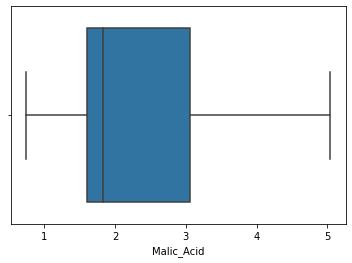

In [87]:
sns.boxplot(data_frame['Malic_Acid'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


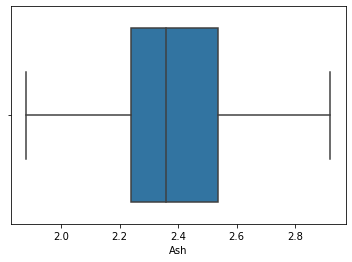

In [88]:
sns.boxplot(data_frame['Ash'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


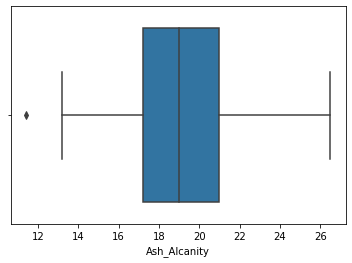

In [89]:
sns.boxplot(data_frame['Ash_Alcanity'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


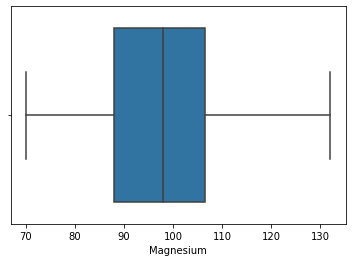

In [90]:
sns.boxplot(data_frame['Magnesium'])
plt.show()

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


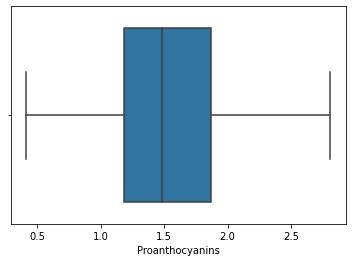

In [91]:
sns.boxplot(data_frame['Proanthocyanins'])
plt.show()

<h4> Observaciones </h4>
Se puede observar que a pesar de la limpieza de outliers se volvieron a encontrar outliers por ende se procede a realizar los pasos antes mostrados.

Se encontró outlier en las columna de Ash_Alcanity.

# Calculos del cuartil para la columna que tiene outlier en este caso es: Ash_Alcanity 

In [92]:
Q1_Ash_Alcanity = data_frame['Ash_Alcanity'].quantile(0.25)
print("Primer cuartil",Q1_Ash_Alcanity)
Q3_Ash_Alcanity = data_frame['Ash_Alcanity'].quantile(0.75)
print("Tercer cuartil",Q3_Ash_Alcanity)

IQR_Ash_Alcanity = Q3_Ash_Alcanity-Q1_Ash_Alcanity
print("Rango intercuartil",IQR_Ash_Alcanity)

Mediana_Ash_Alcanity = data_frame['Ash_Alcanity'].median()
print("La mediana es :",Mediana_Ash_Alcanity)
Valor_minimo_Ash_Alcanity = data_frame['Ash_Alcanity'].min()
print("Valor minimo :",Valor_minimo_Ash_Alcanity)
Valor_maximo_Ash_Alcanity = data_frame['Ash_Alcanity'].max()
print("Valor maximo es :",Valor_maximo_Ash_Alcanity)

#Calculamos los valores de los bigotes inferior y superior
BI_Calculado_Ash_Alcanity = (Q1_Ash_Alcanity - 1.5 * IQR_Ash_Alcanity)
print("BI Calculado:",BI_Calculado_Ash_Alcanity)

BS_Calculado_Ash_Alcanity = (Q3_Ash_Alcanity + 1.5 * IQR_Ash_Alcanity)
print("BS Calcular:",BS_Calculado_Ash_Alcanity)


Primer cuartil 17.2
Tercer cuartil 21.0
Rango intercuartil 3.8000000000000007
La mediana es : 19.0
Valor minimo : 11.4
Valor maximo es : 26.5
BI Calculado: 11.499999999999998
BS Calcular: 26.700000000000003


<h4> Observaciones </h4>

Se puede observar que el valor minimo(11.4) es menor al BI(11.499999999999998) por ende ya se sabe desde que límite se efectuará la limpieza

In [93]:
ubicacion_outliers_Ash_Alcanity =  (data_frame['Ash_Alcanity'] < BI_Calculado_Ash_Alcanity) | (data_frame['Ash_Alcanity'] > BS_Calculado_Ash_Alcanity)  
print("\n Ubicacion de outliers \n",ubicacion_outliers_Ash_Alcanity)


 Ubicacion de outliers 
 0      False
2      False
3      False
4      False
5      False
       ...  
172    False
174    False
175    False
176    False
177    False
Name: Ash_Alcanity, Length: 151, dtype: bool


In [94]:
outliers_Ash_Alcanity = data_frame[ubicacion_outliers_Ash_Alcanity]
print("\n Lista de outliers \n",outliers_Ash_Alcanity)


 Lista de outliers 
     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
13    14.75        1.73  2.39          11.4         91            3.1   

    Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
13        3.69                  0.43             2.81              5.4  1.25   

    OD280  Proline  Customer_Segment  
13   2.73     1150                 1  


<h4> Observaciones </h4>

Se encontró 1 outlier correspondiente a la columna de Ash_Alcanity la cual nos entregó el siguiente resultado: Fila 13 fue la fila outlier.

# Una vez ya identificado el outlier procedemos a realizar la limpieza correspondiente de la columna que presentó outlier

In [95]:
data_frame = data_frame.drop(data_frame[data_frame['Ash_Alcanity'] <= 11.499999999999998].index)


In [96]:
data_frame.shape

(150, 14)

 <h4> Observaciones </h4>

Se puede observar que con la limpieza de los outliers los datos se redujeron a 150


# Volvemos a graficar la columna que presentó outlier para ver si ya no tienen outlier

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


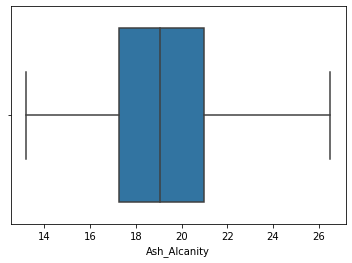

In [97]:
sns.boxplot(data_frame['Ash_Alcanity'])
plt.show()

# Por último se procede a realizar los gráficos boxplot para revisar si todas las columnas ya no presentan outliers

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


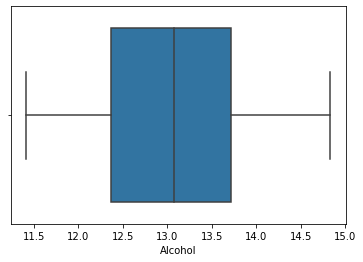

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


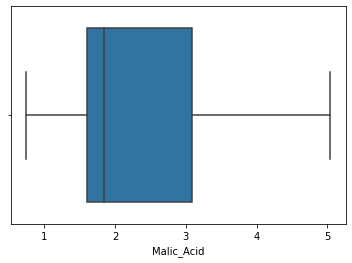

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


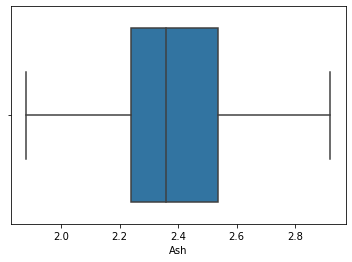

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


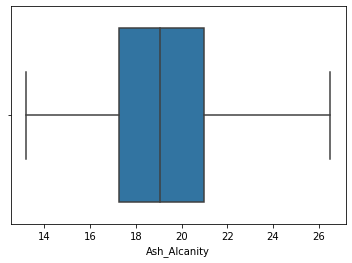

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


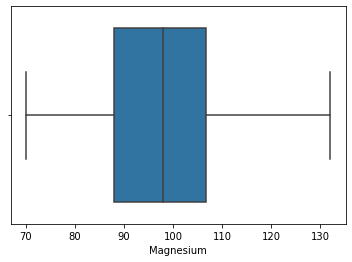

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


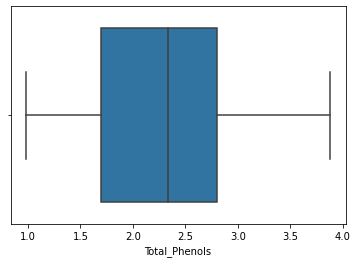

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


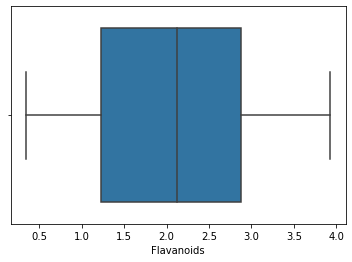

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


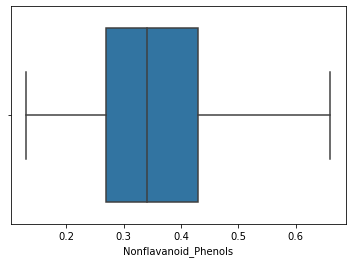

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


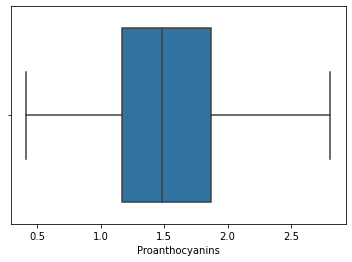

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


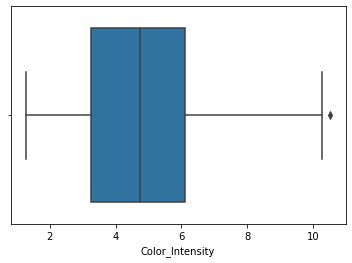

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


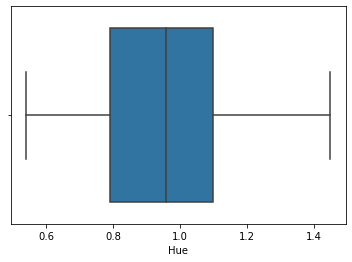

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


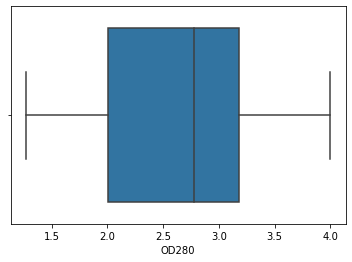

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


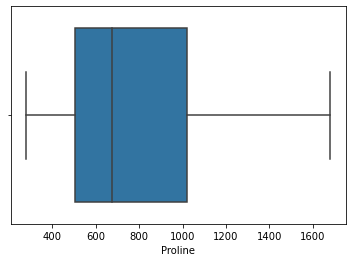

C:\Users\Alumno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


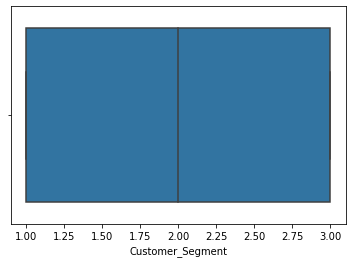

In [98]:
#Boxplot forma 1
df1=data_frame.select_dtypes(exclude='object')
for i in range(len(df1.columns)):
    sns.boxplot(df1.iloc[:,i])
    plt.show()

<h4> Observaciones </h4>
Con los gráficos anteriores se puede observar que ya no quedan outliers en ninguna columna por lo que la limpieza fue generada de manera exitosa.

# Graficos de distribución


In [99]:
data_frame.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

<AxesSubplot:xlabel='Ash', ylabel='Count'>

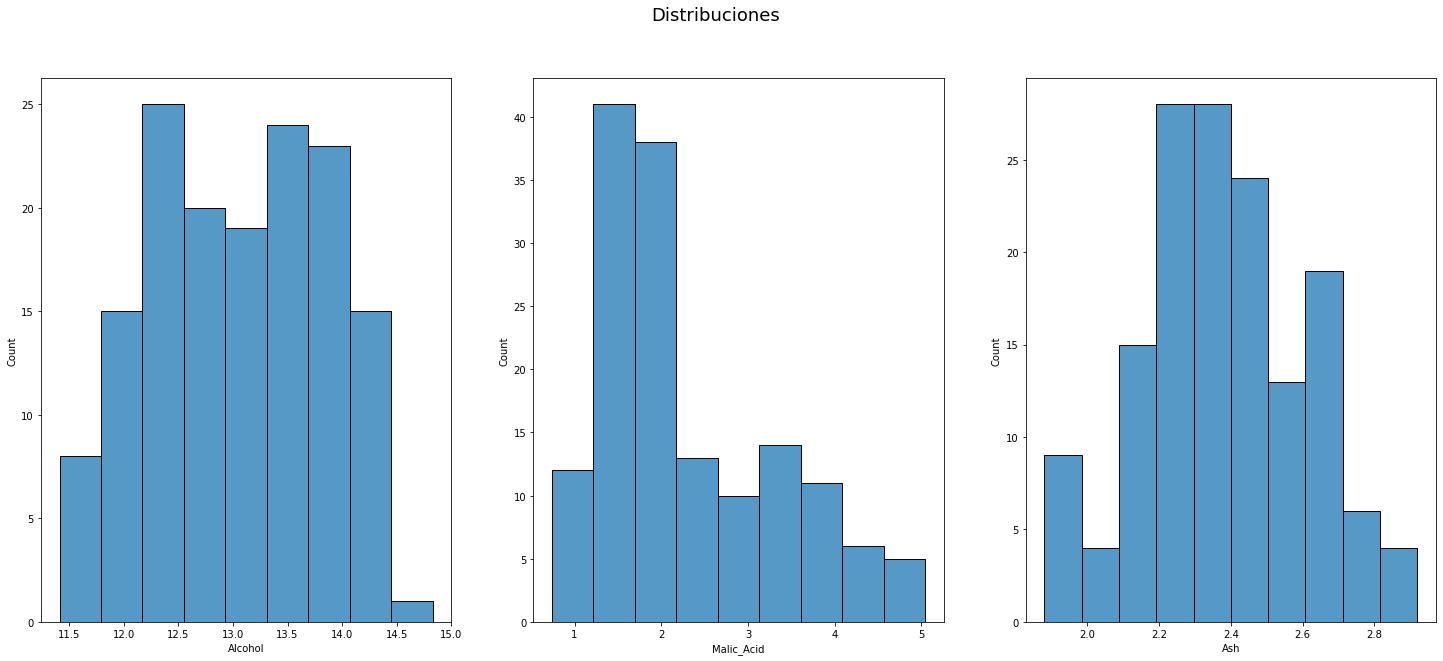

In [100]:
fig,ax = plt.subplots(1,3,figsize=(25,10))
fig.suptitle("Distribuciones",fontsize=18)
sns.histplot(data_frame['Alcohol'],ax=ax[0],kde=False)
sns.histplot(data_frame['Malic_Acid'],ax=ax[1],kde=False)
sns.histplot(data_frame['Ash'],ax=ax[2],kde=False)

<h4> Observaciones </h4>
Para empezar hablaremos de la distribucion de el numero de serie el cual cuenta con una grafica casi uniforme, es decir que todos los datos se encuentran casi a la misma cantidad. Luego tenemos el de puntaje de educacion el cual se ve un diseño tipo escalar en base a los datos el cual cuenta con altos y bajos. Para finalizar tenemos el grafico de puntaje de educacion secundaria el cual es tiene una estructura igual al grafico anterior pero con mayor pronunciacion en su tope medio, ademas tiene forma de campana de gauss.

<AxesSubplot:xlabel='Total_Phenols', ylabel='Count'>

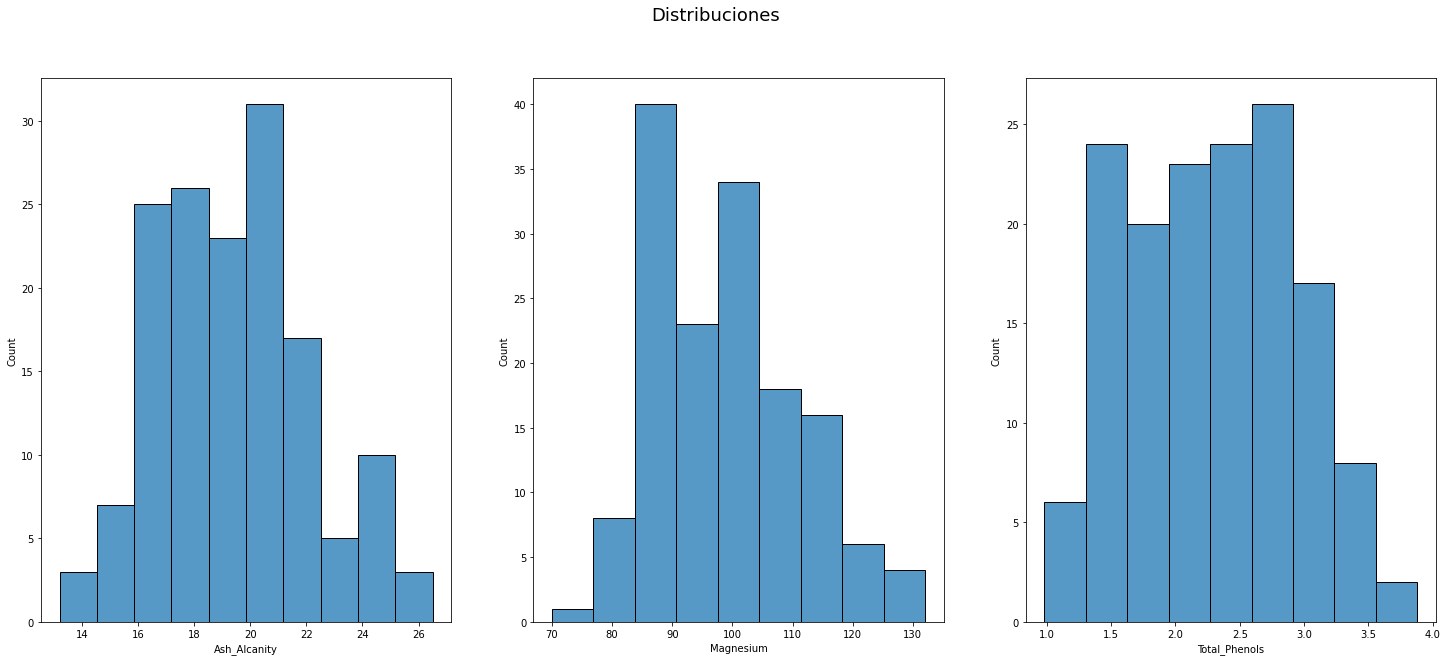

In [101]:
fig,ax = plt.subplots(1,3,figsize=(25,10))
fig.suptitle("Distribuciones",fontsize=18)
sns.histplot(data_frame['Ash_Alcanity'],ax=ax[0],kde=False)
sns.histplot(data_frame['Magnesium'],ax=ax[1],kde=False)
sns.histplot(data_frame['Total_Phenols'],ax=ax[2],kde=False)

<h4> Observaciones </h4>
Para empezar hablaremos de la distribucion de el numero de serie el cual cuenta con una grafica casi uniforme, es decir que todos los datos se encuentran casi a la misma cantidad. Luego tenemos el de puntaje de educacion el cual se ve un diseño tipo escalar en base a los datos el cual cuenta con altos y bajos. Para finalizar tenemos el grafico de puntaje de educacion secundaria el cual es tiene una estructura igual al grafico anterior pero con mayor pronunciacion en su tope medio, ademas tiene forma de campana de gauss.

<AxesSubplot:xlabel='Proanthocyanins', ylabel='Count'>

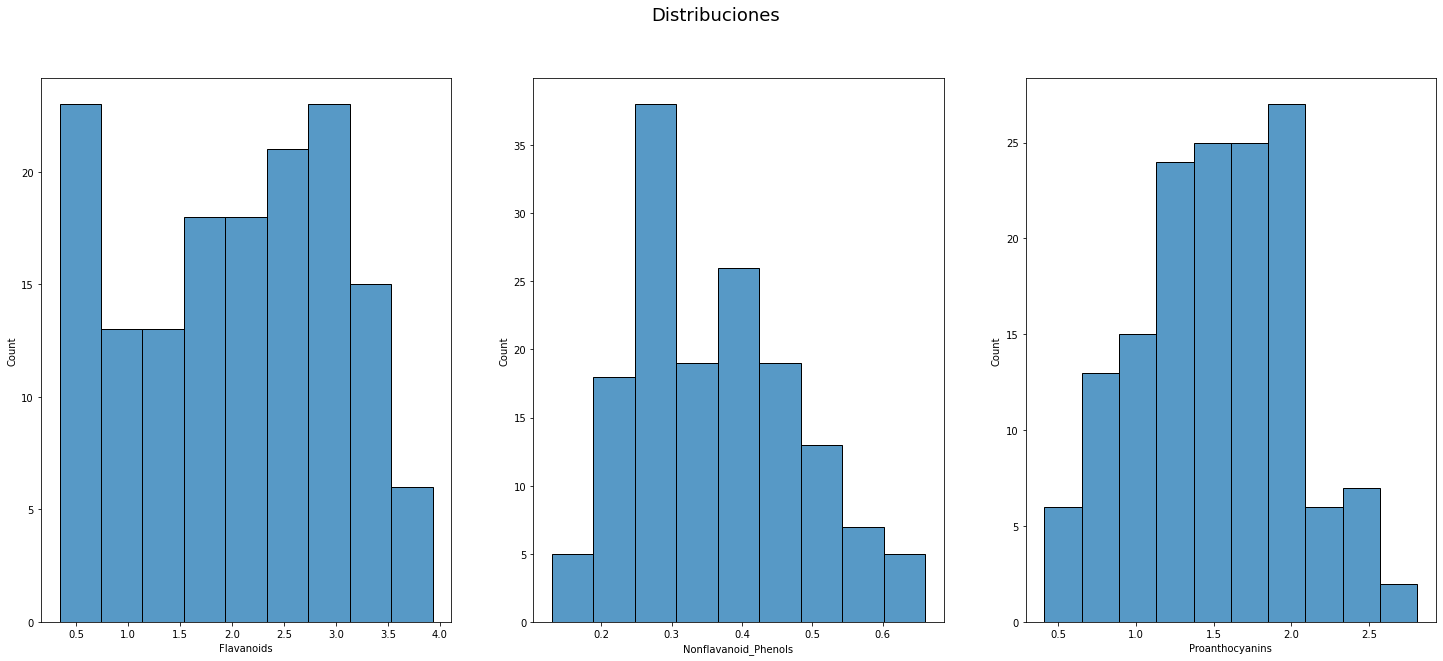

In [102]:
fig,ax = plt.subplots(1,3,figsize=(25,10))
fig.suptitle("Distribuciones",fontsize=18)
sns.histplot(data_frame['Flavanoids'],ax=ax[0],kde=False)
sns.histplot(data_frame['Nonflavanoid_Phenols'],ax=ax[1],kde=False)
sns.histplot(data_frame['Proanthocyanins'],ax=ax[2],kde=False)

<h4> Observaciones </h4>
Para empezar hablaremos de la distribucion de el numero de serie el cual cuenta con una grafica casi uniforme, es decir que todos los datos se encuentran casi a la misma cantidad. Luego tenemos el de puntaje de educacion el cual se ve un diseño tipo escalar en base a los datos el cual cuenta con altos y bajos. Para finalizar tenemos el grafico de puntaje de educacion secundaria el cual es tiene una estructura igual al grafico anterior pero con mayor pronunciacion en su tope medio, ademas tiene forma de campana de gauss.

<AxesSubplot:xlabel='OD280', ylabel='Count'>

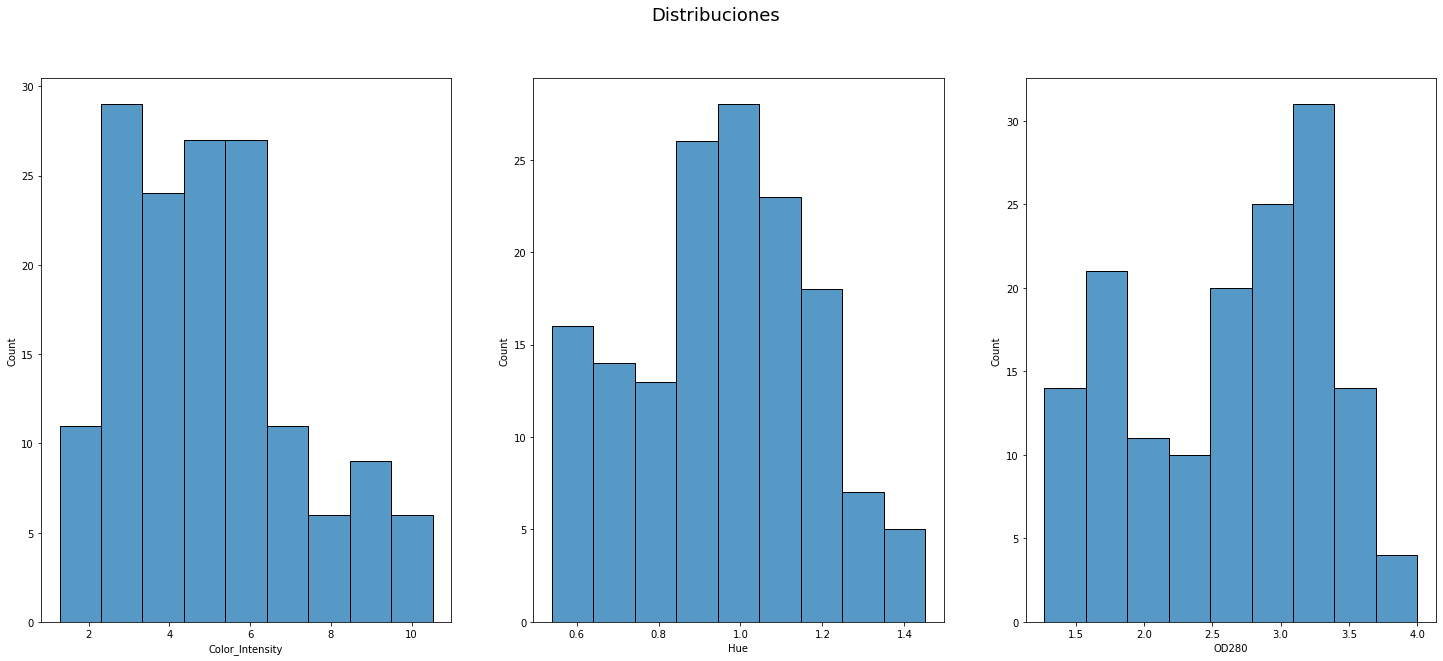

In [103]:
fig,ax = plt.subplots(1,3,figsize=(25,10))
fig.suptitle("Distribuciones",fontsize=18)
sns.histplot(data_frame['Color_Intensity'],ax=ax[0],kde=False)
sns.histplot(data_frame['Hue'],ax=ax[1],kde=False)
sns.histplot(data_frame['OD280'],ax=ax[2],kde=False)

<h4> Observaciones </h4>
Para empezar hablaremos de la distribucion de el numero de serie el cual cuenta con una grafica casi uniforme, es decir que todos los datos se encuentran casi a la misma cantidad. Luego tenemos el de puntaje de educacion el cual se ve un diseño tipo escalar en base a los datos el cual cuenta con altos y bajos. Para finalizar tenemos el grafico de puntaje de educacion secundaria el cual es tiene una estructura igual al grafico anterior pero con mayor pronunciacion en su tope medio, ademas tiene forma de campana de gauss.

<AxesSubplot:xlabel='Customer_Segment', ylabel='Count'>

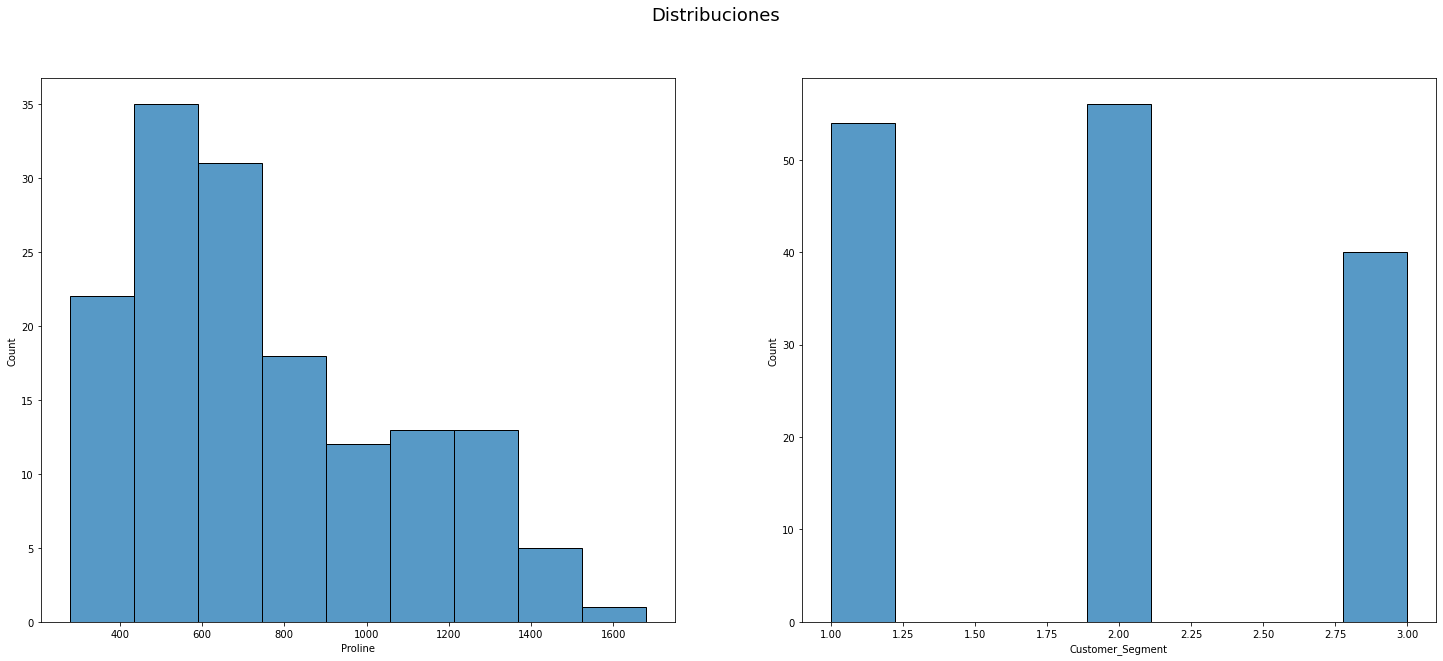

In [104]:
fig,ax = plt.subplots(1,2,figsize=(25,10))
fig.suptitle("Distribuciones",fontsize=18)
sns.histplot(data_frame['Proline'],ax=ax[0],kde=False)
sns.histplot(data_frame['Customer_Segment'],ax=ax[1],kde=False)


<h4> Observaciones </h4>
Para empezar hablaremos de la distribucion de el numero de serie el cual cuenta con una grafica casi uniforme, es decir que todos los datos se encuentran casi a la misma cantidad. Luego tenemos el de puntaje de educacion el cual se ve un diseño tipo escalar en base a los datos el cual cuenta con altos y bajos. Para finalizar tenemos el grafico de puntaje de educacion secundaria el cual es tiene una estructura igual al grafico anterior pero con mayor pronunciacion en su tope medio, ademas tiene forma de campana de gauss.

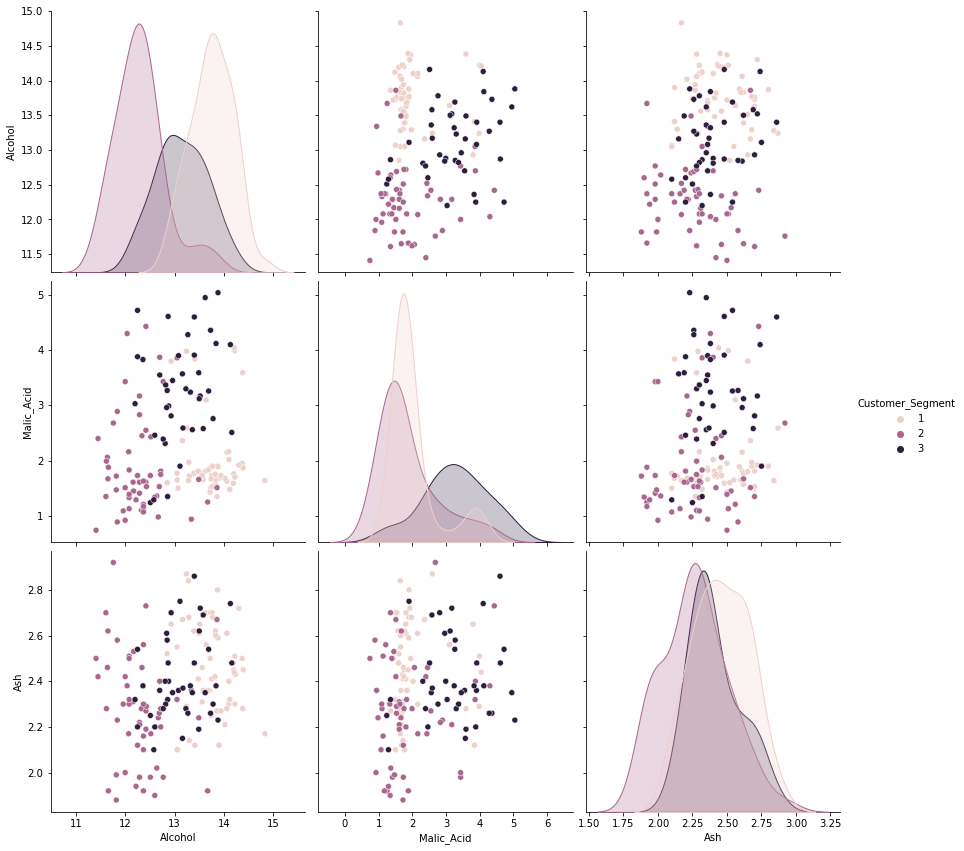

In [105]:
sns.pairplot(data_frame.dropna(), hue='Customer_Segment', height=4,vars=["Alcohol","Malic_Acid","Ash"], kind= 'scatter')

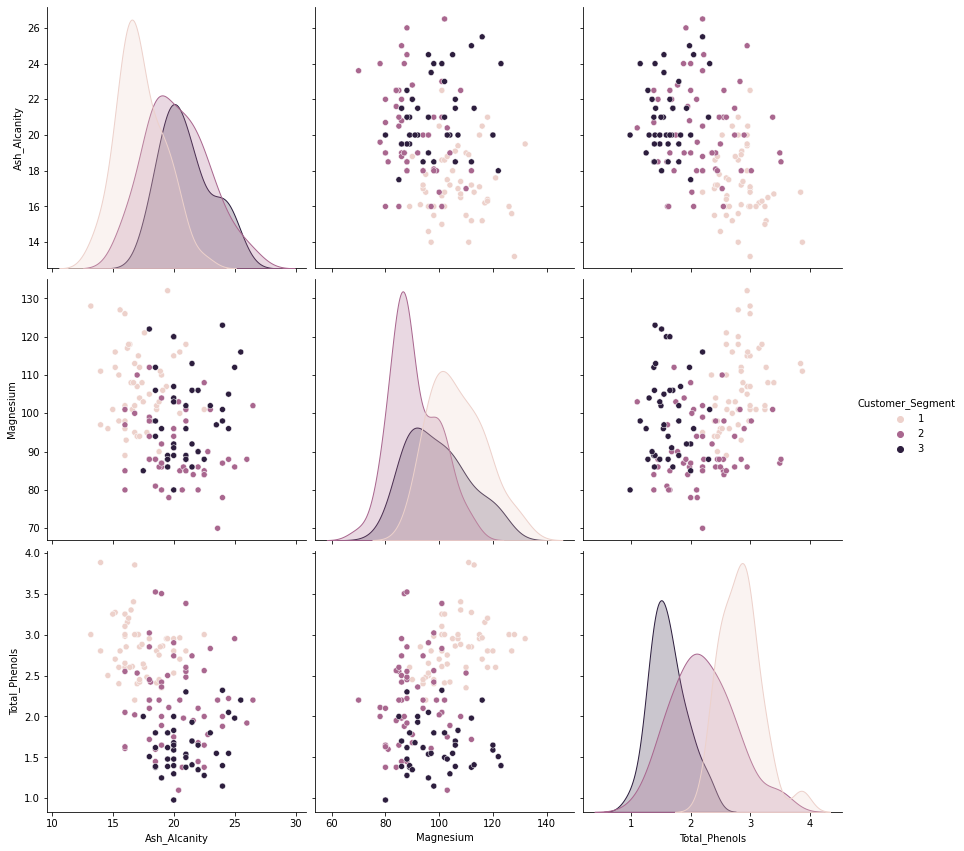

In [106]:
sns.pairplot(data_frame.dropna(), hue='Customer_Segment', height=4,vars=["Ash_Alcanity","Magnesium","Total_Phenols"], kind= 'scatter')

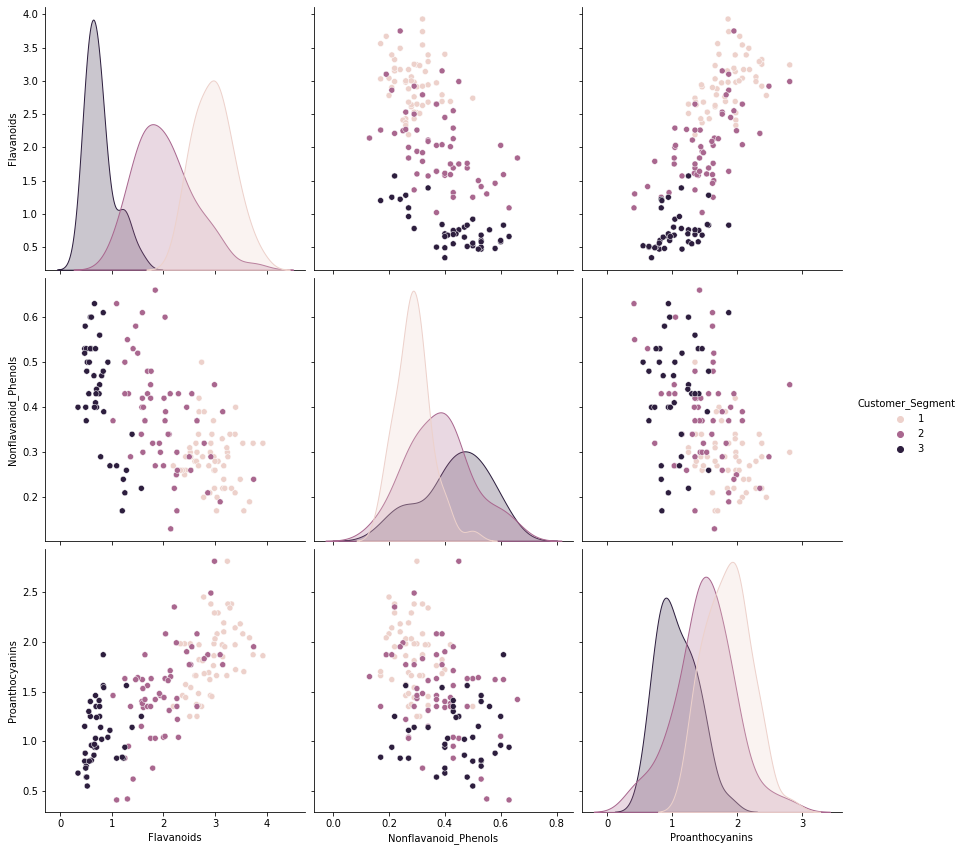

In [107]:
sns.pairplot(data_frame.dropna(), hue='Customer_Segment', height=4,vars=["Flavanoids","Nonflavanoid_Phenols","Proanthocyanins"], kind= 'scatter')

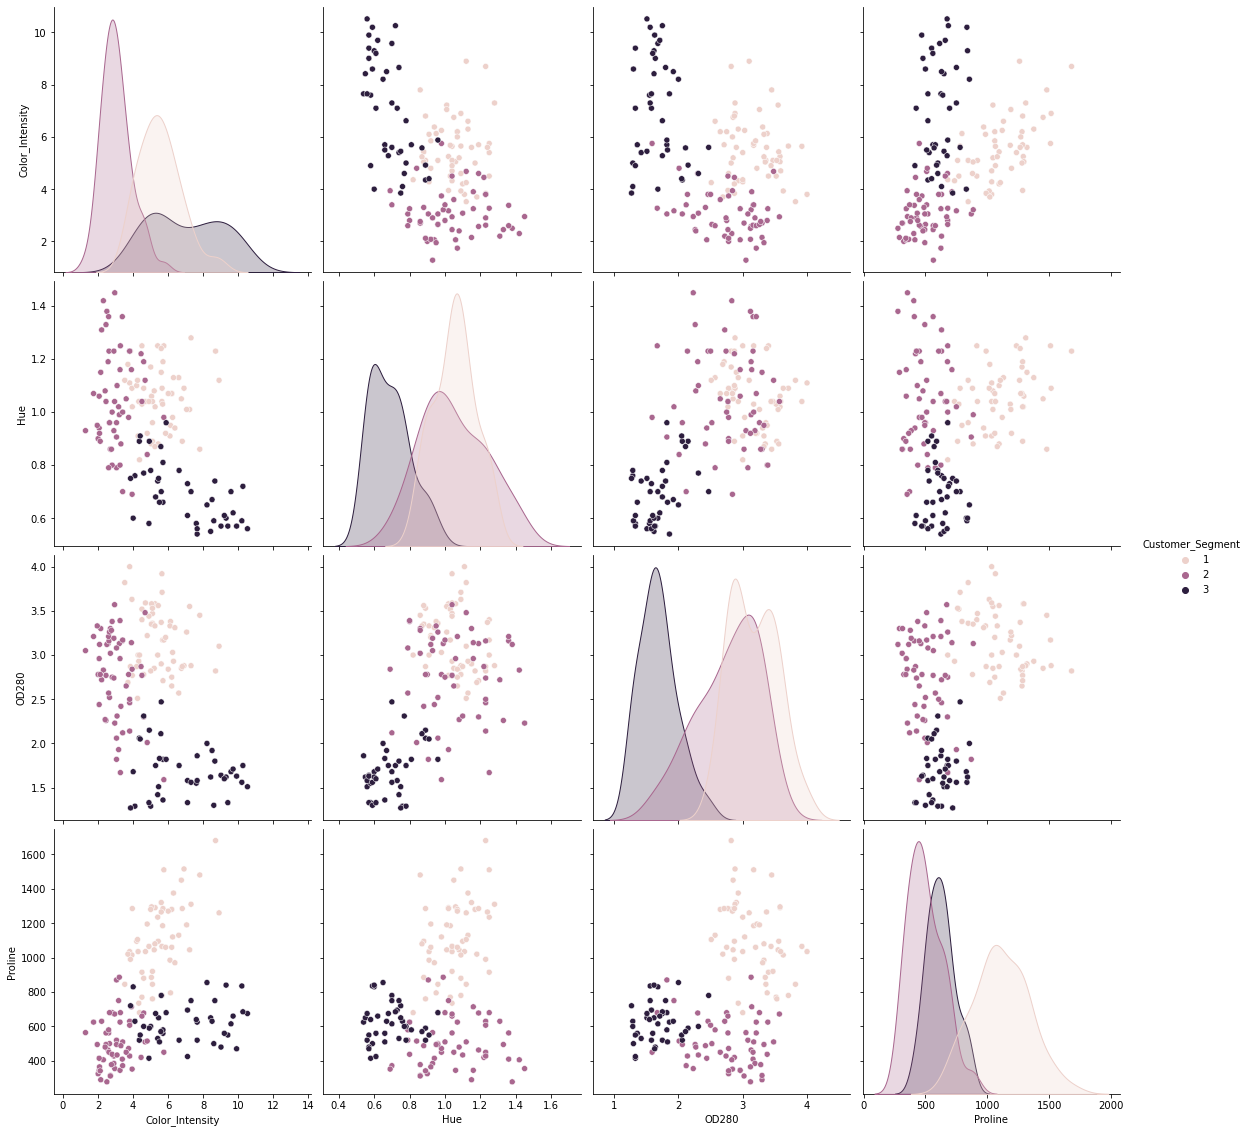

In [108]:
sns.pairplot(data_frame.dropna(), hue='Customer_Segment', height=4,vars=["Color_Intensity","Hue","OD280","Proline"], kind= 'scatter')

In [ ]:
data_frame.columns

In [ ]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing

X = preprocessing.Normalizer().fit_transform(data_frame[["Ash","Ash_Alcanity","Magnesium","Proanthocyanins"]])
X = np.array(X)

In [ ]:
y = np.array(data_frame['Customer_Segment'])


In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']

asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2],X[:, 3], c=asignar,s=10)
plt.show()